In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from aging.plotting import format_plots, figure, save_factory, legend, PlotConfig

In [2]:
format_plots()

In [3]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_raw_usage_matrix_v00.parquet')
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype='int32')
df = df[keep_syllables]

usage_order = df.quantile(0.9).sort_values(ascending=False).index
df = df[usage_order].astype('float32')

In [4]:
def zscore(ser):
    return (ser - ser.mean()) / ser.std()

# Distance matrix with cosine distance (no pca)

In [5]:
# image_ctx = {'image.cmap': 'cubehelix', 'image.aspect': 'auto', 'image.interpolation': 'none'}
image_ctx = {'image.cmap': 'cubehelix', 'image.interpolation': 'none'}

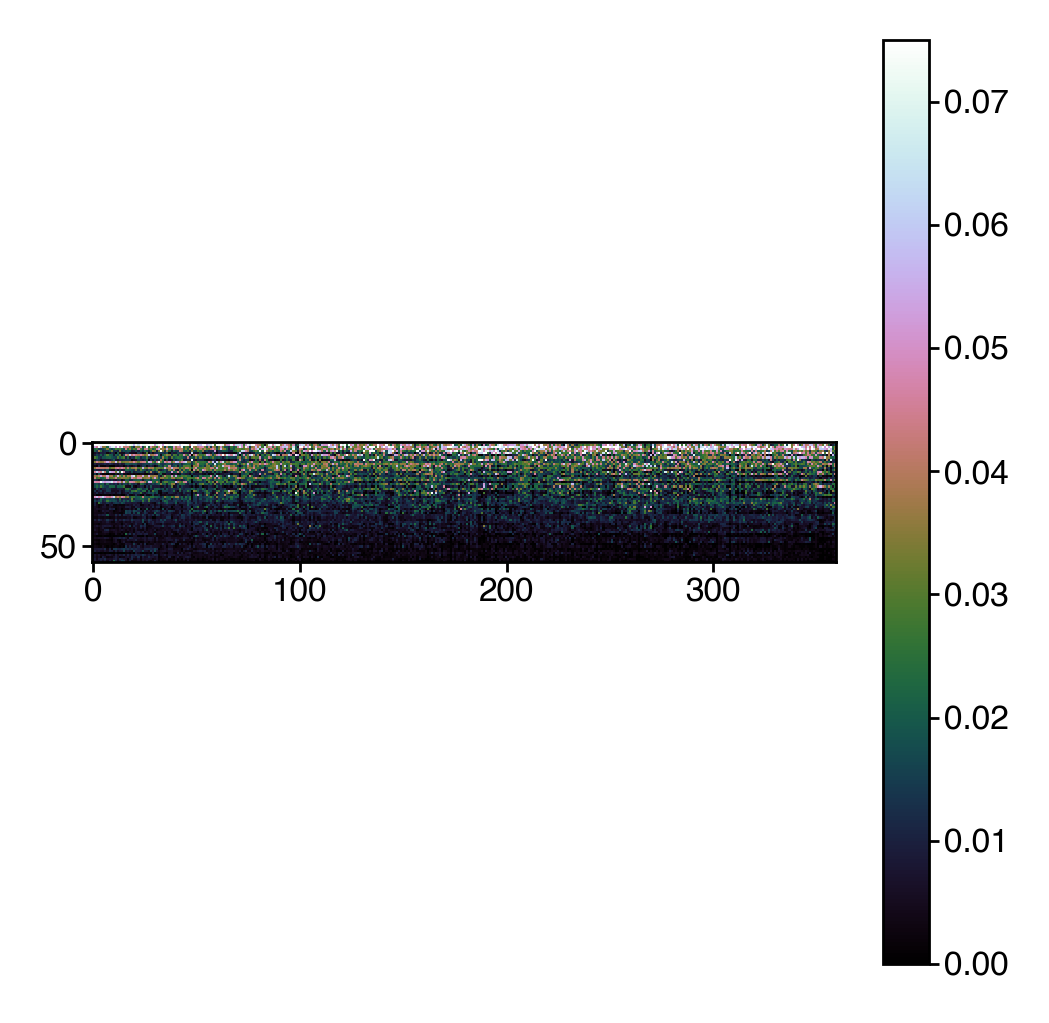

In [42]:
with plt.rc_context(image_ctx):
    plt.imshow(df.T, vmax=0.075)
    plt.colorbar()

## Distance matrices on all syllables and sessions (90% explained frames cutoff)

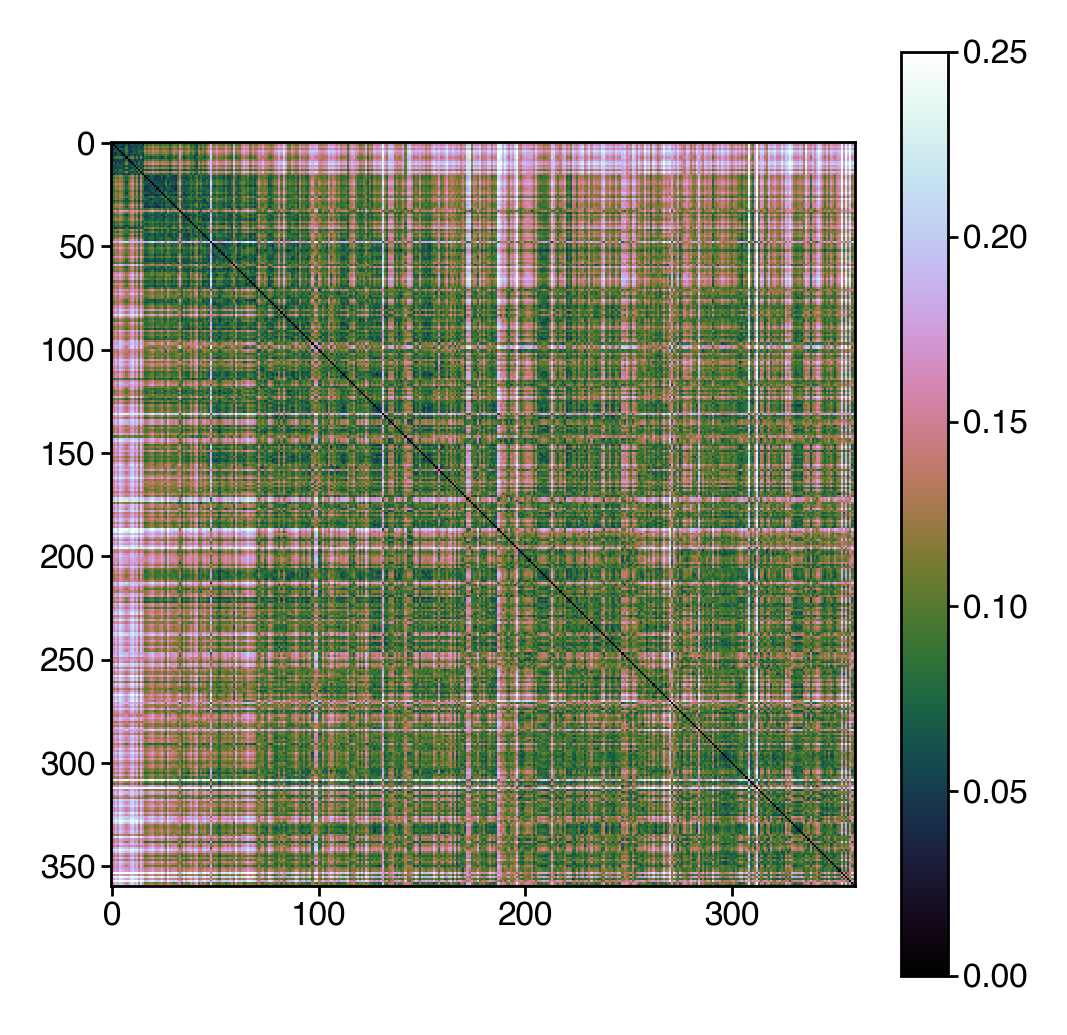

In [43]:
dists = squareform(pdist(df, metric='euclidean'))
with plt.rc_context(image_ctx):
    plt.imshow(dists, vmax=0.25)
    plt.colorbar()

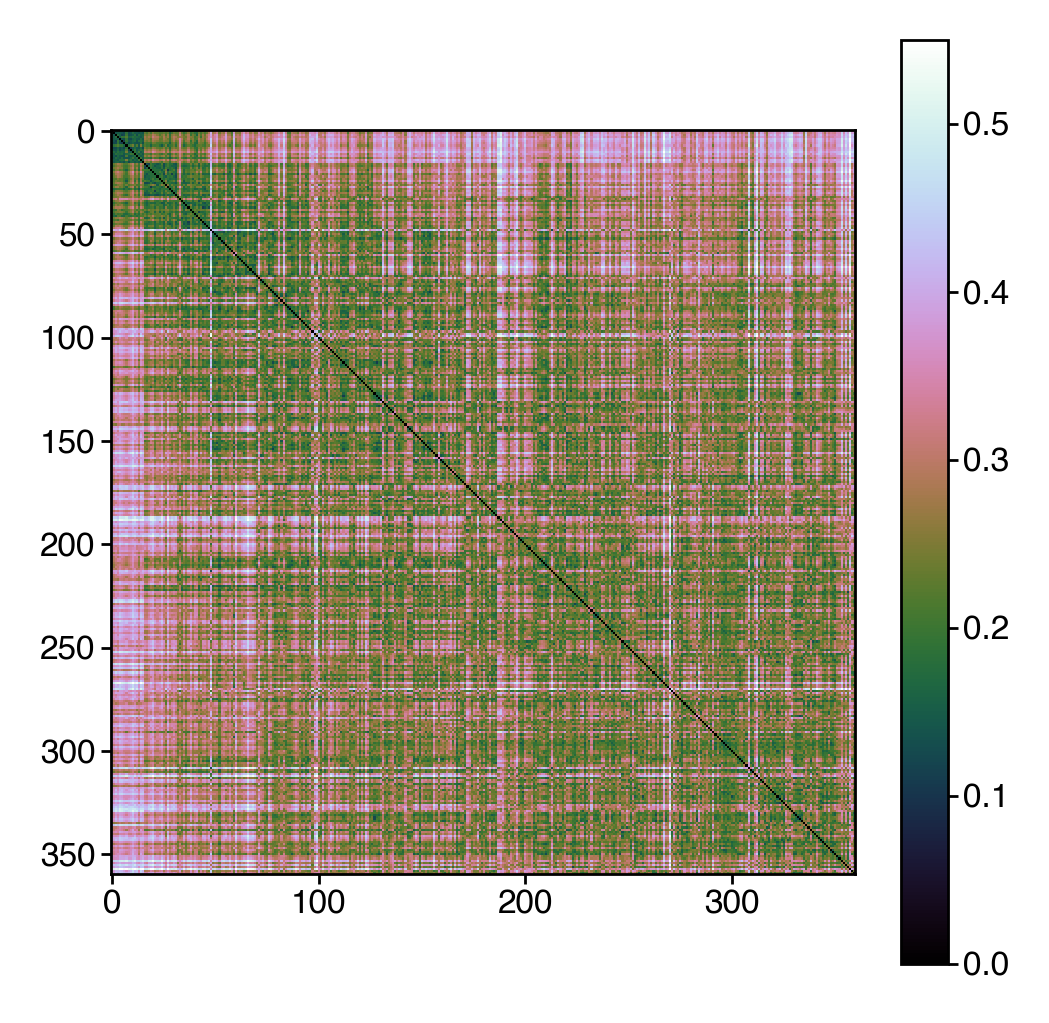

In [44]:
dists = squareform(pdist(df, metric='jensenshannon'))
with plt.rc_context(image_ctx):
    plt.imshow(dists, vmax=0.55)
    plt.colorbar()

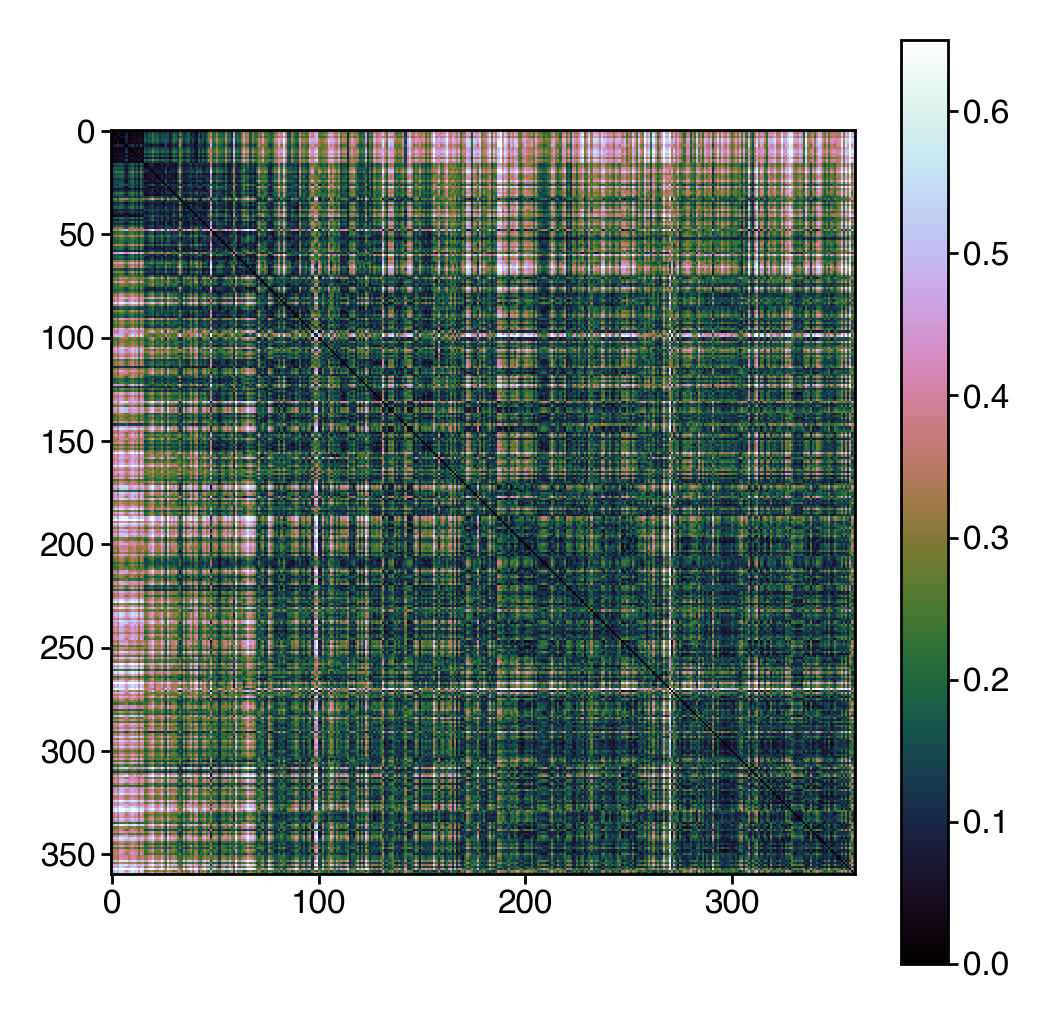

In [45]:
dists = squareform(pdist(df, metric='cosine'))
with plt.rc_context(image_ctx):
    plt.imshow(dists, vmax=0.65)
    plt.colorbar()

### PCA on all sessions

In [99]:
pca = PCA(n_components=10, whiten=True)
pcs = pca.fit_transform(df)

In [100]:
pc_df = pd.DataFrame(pcs, index=df.index)

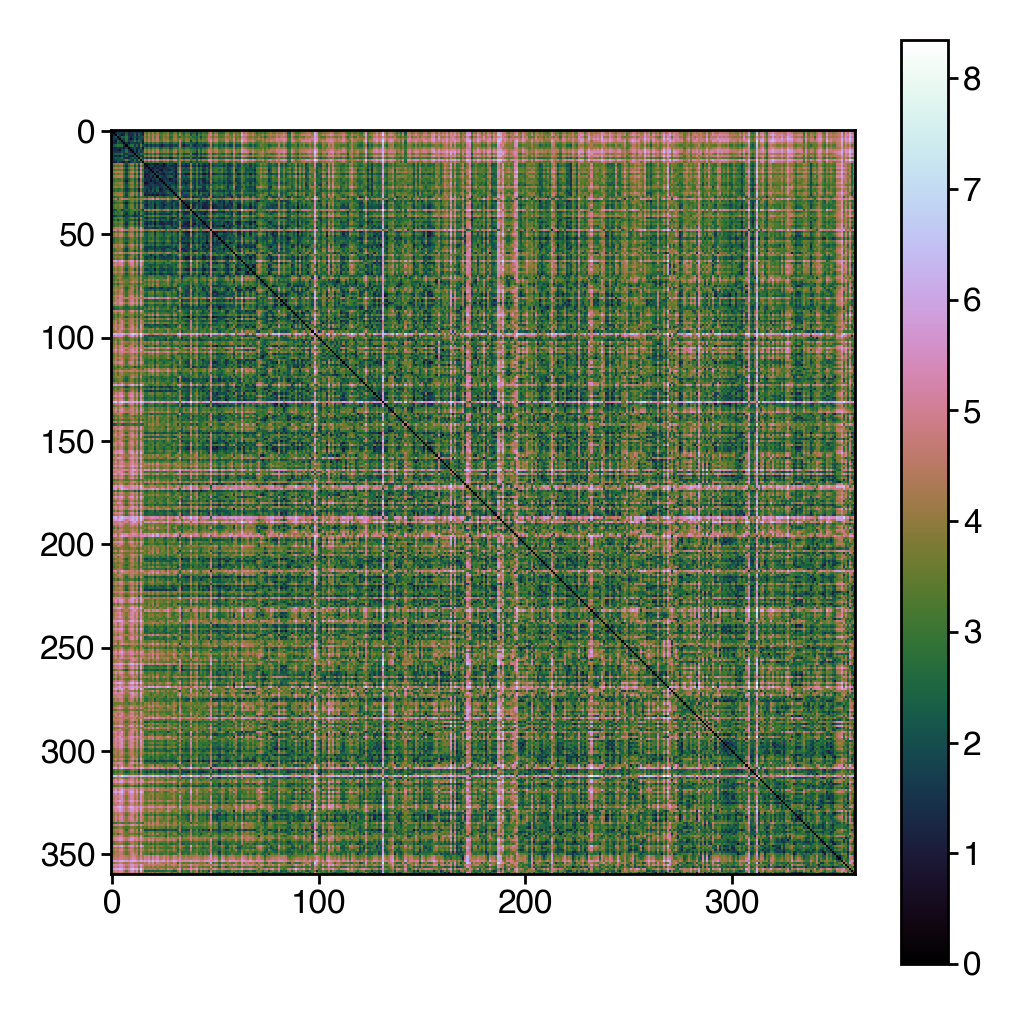

In [101]:
dists = squareform(pdist(pc_df.loc[:, :5], metric='euclidean'))
with plt.rc_context(image_ctx):
    plt.imshow(dists)
    plt.colorbar()

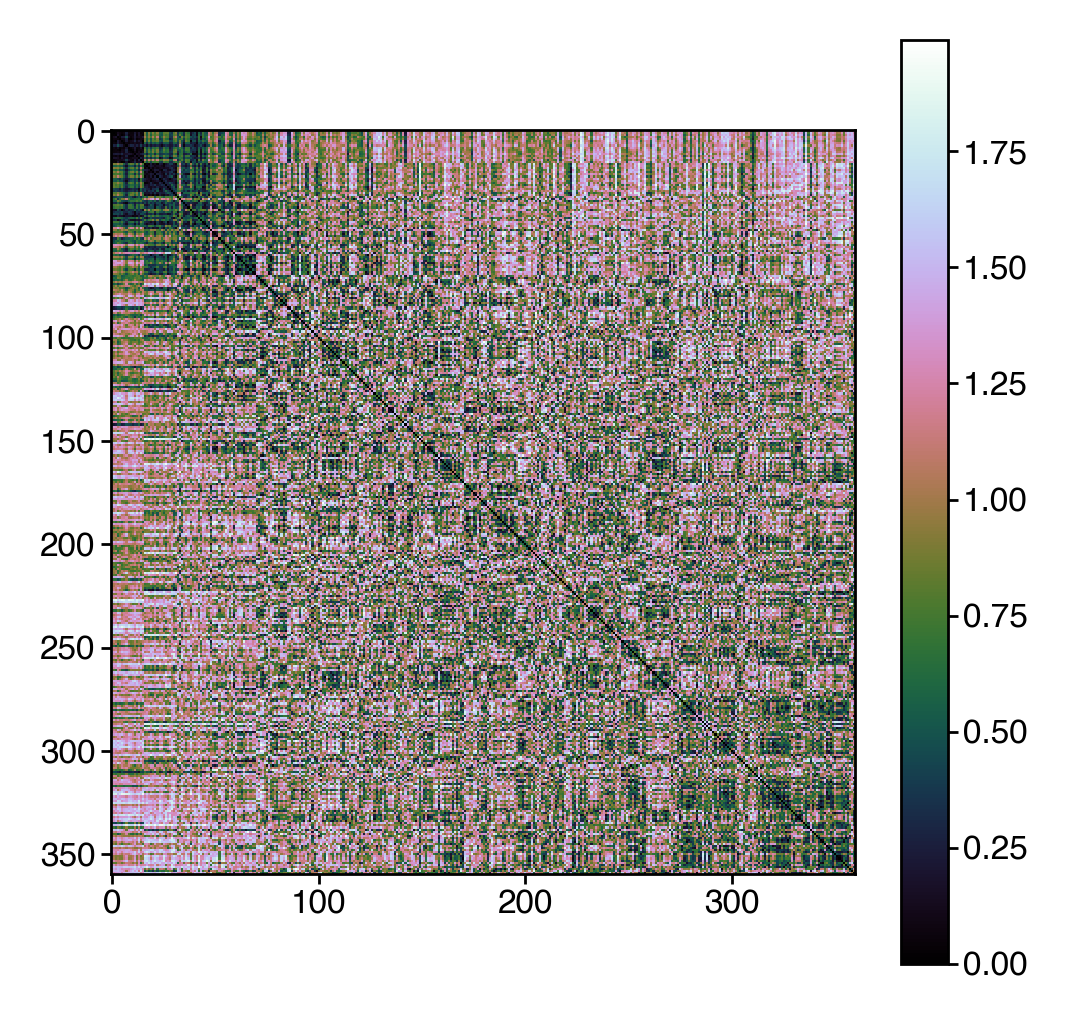

In [102]:
dists = squareform(pdist(pc_df.loc[:, :5], metric='cosine'))
with plt.rc_context(image_ctx):
    plt.imshow(dists)
    plt.colorbar()

## Distance matrices on all syllables and avg. sessions (90% explained frames cutoff)

In [46]:
avg_df = df.groupby('age').mean()

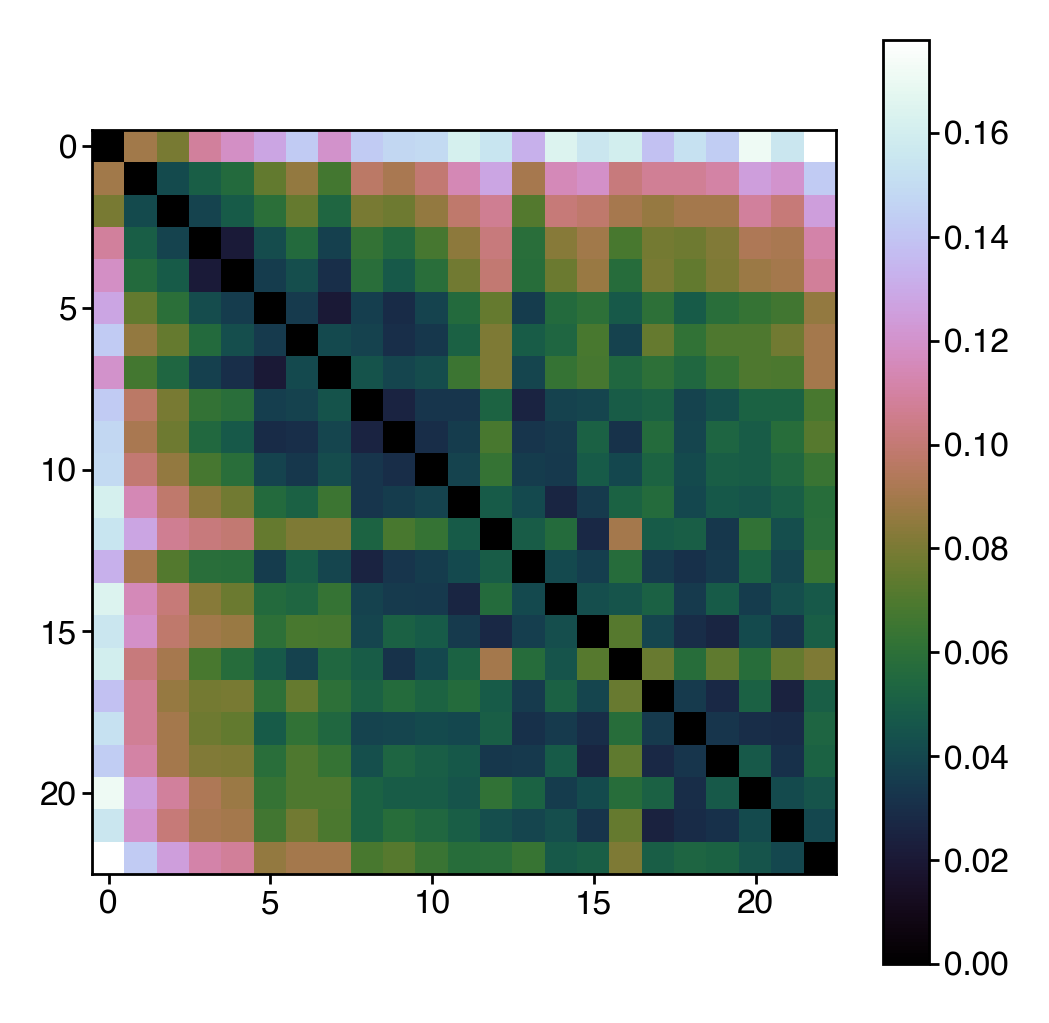

In [47]:
dists = squareform(pdist(avg_df, metric='euclidean'))
with plt.rc_context(image_ctx):
    plt.imshow(dists)
    plt.colorbar()

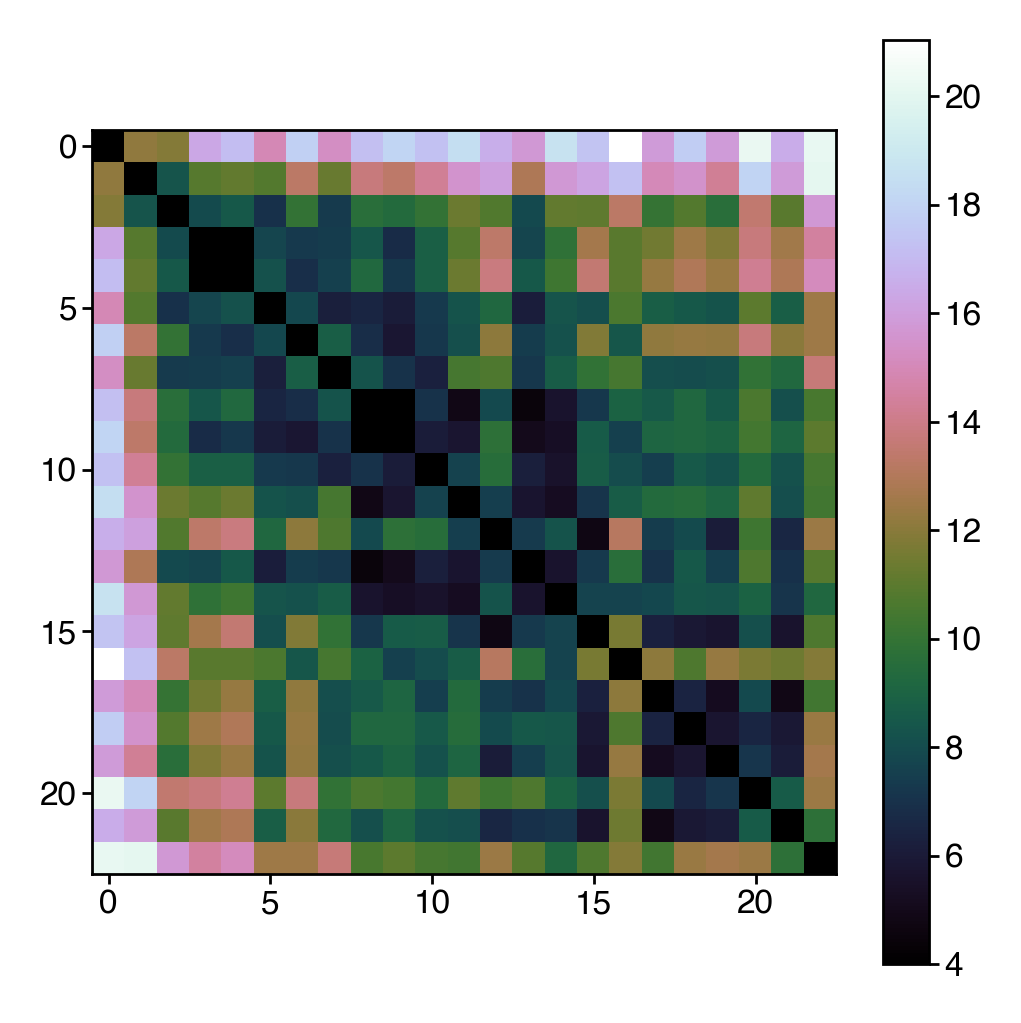

In [78]:
# z-scored
dists = squareform(pdist(zscore(avg_df), metric='euclidean'))
# dists[np.diag_indices_from(dists)] = np.nan
with plt.rc_context(image_ctx):
    plt.imshow(dists, vmin=4)
    plt.colorbar()

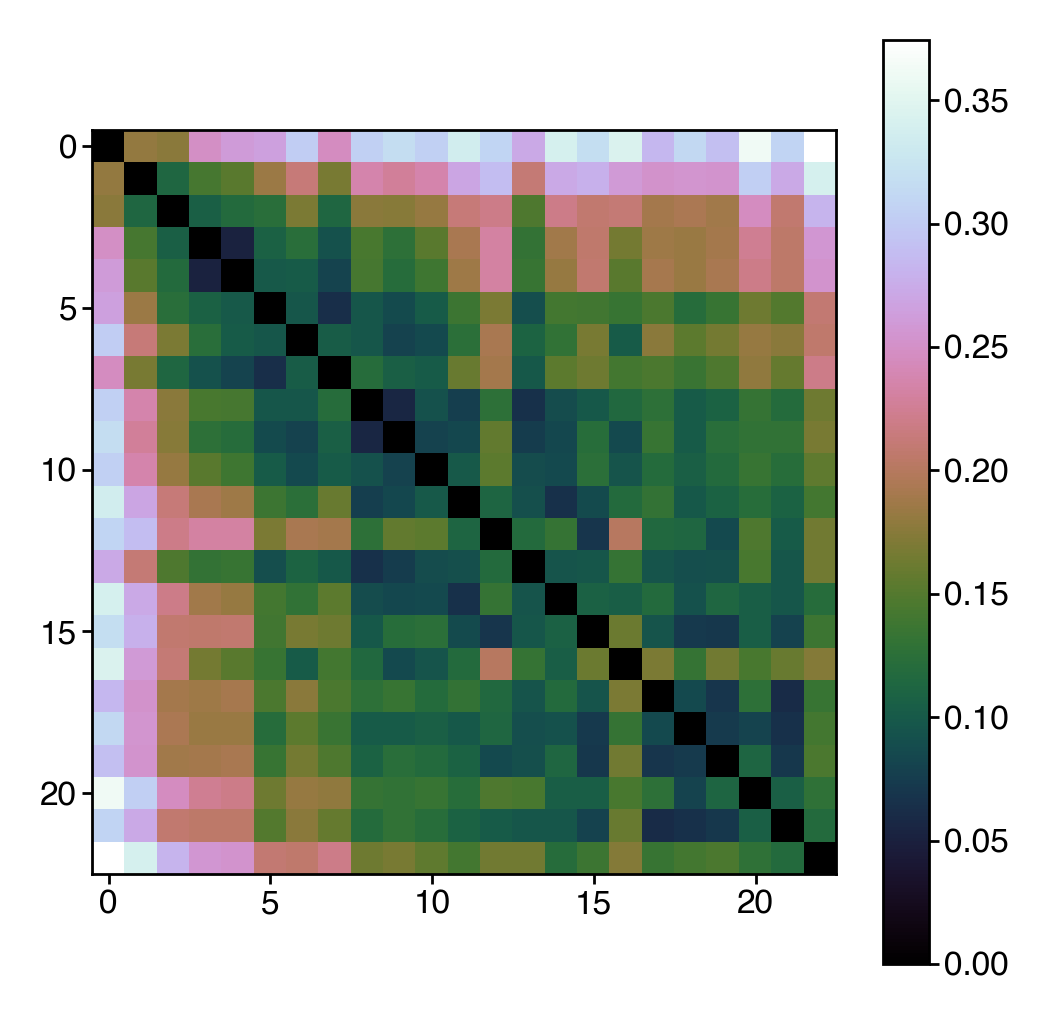

In [48]:
dists = squareform(pdist(avg_df, metric='jensenshannon'))
with plt.rc_context(image_ctx):
    plt.imshow(dists)
    plt.colorbar()

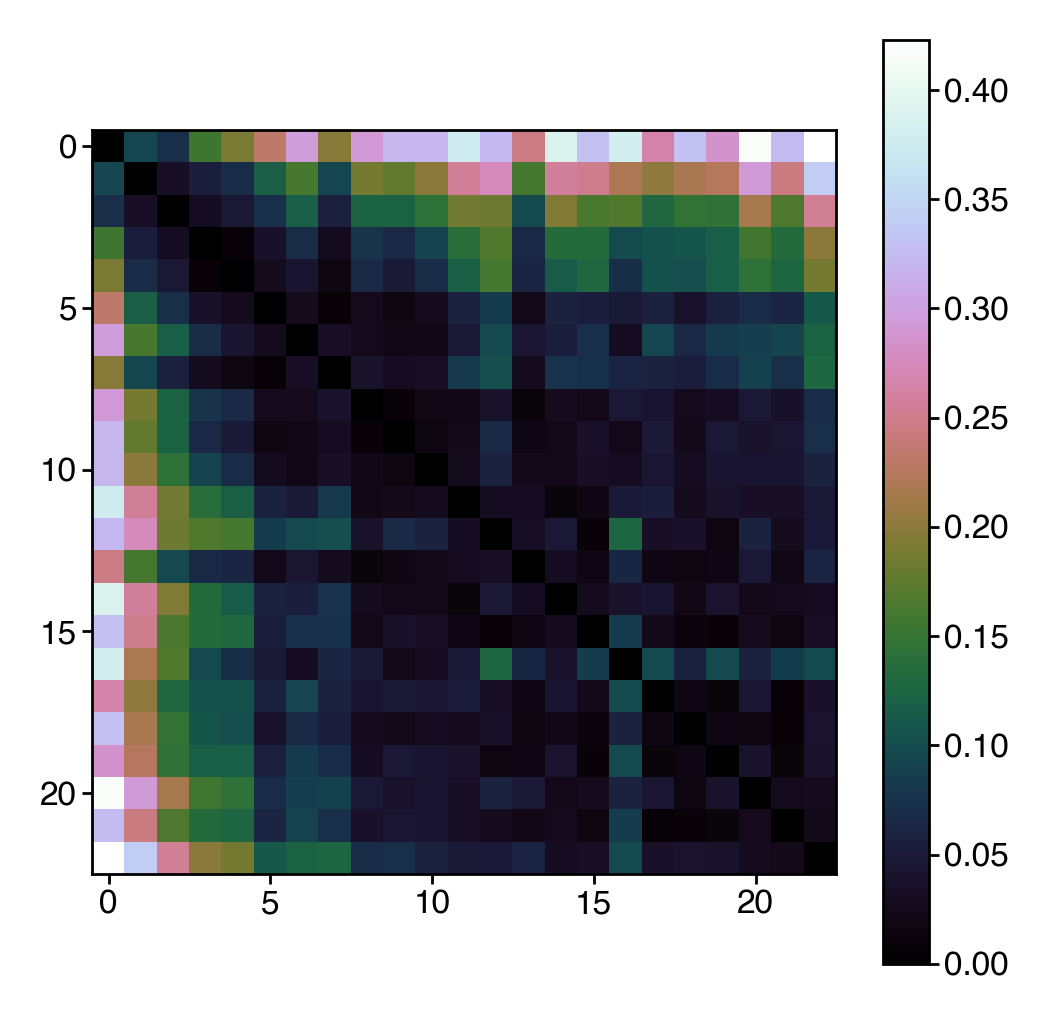

In [50]:
dists = squareform(pdist(avg_df, metric='cosine'))
with plt.rc_context(image_ctx):
    plt.imshow(dists)
    plt.colorbar()

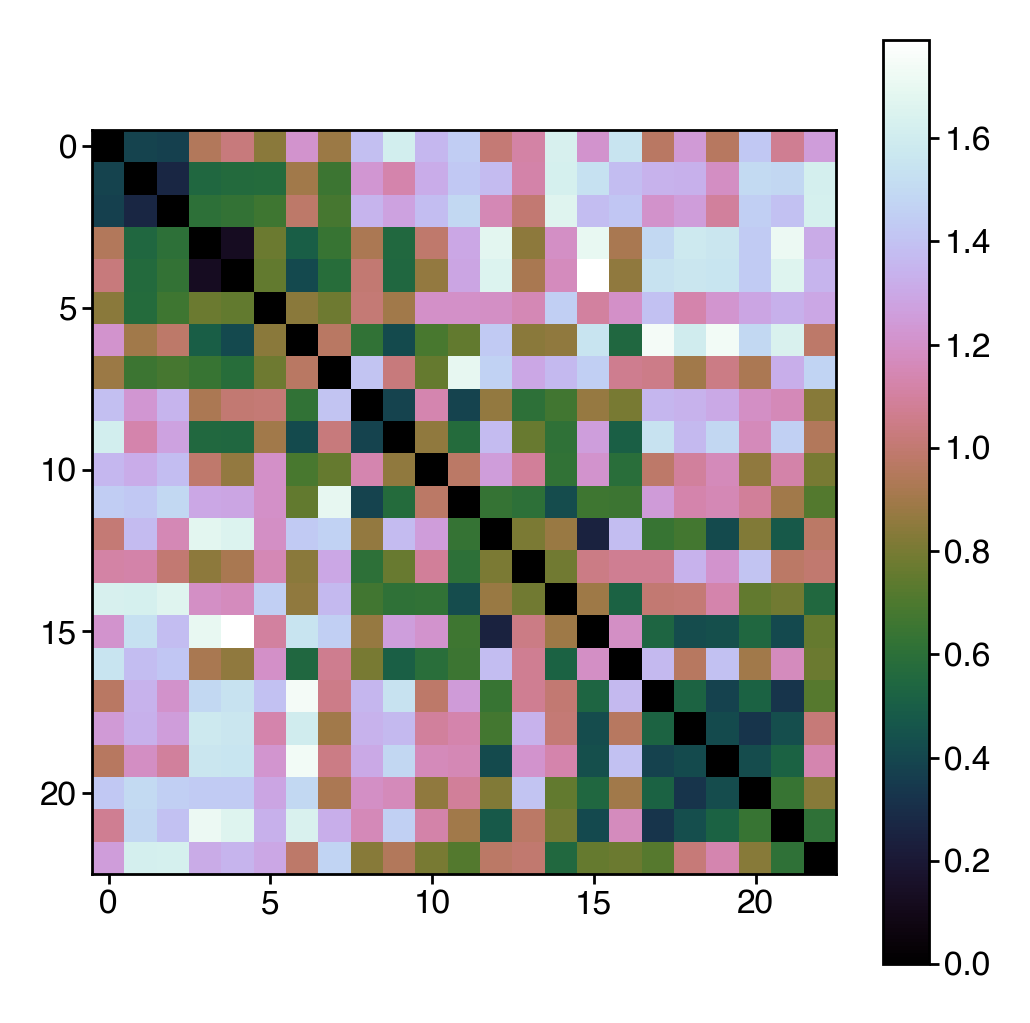

In [81]:
# z-scored
dists = squareform(pdist(zscore(avg_df), metric='cosine'))
# dists[np.diag_indices_from(dists)] = np.nan
with plt.rc_context(image_ctx):
    plt.imshow(dists)
    plt.colorbar()

## Distance matrices on PCs and avg. sessions (90% explained frames cutoff)

In [67]:
pca = PCA(n_components=10)
pcs = pca.fit_transform(df)

In [68]:
pc_df = pd.DataFrame(pcs, index=df.index)

In [69]:
avg_pc_df = pc_df.groupby('age').mean()

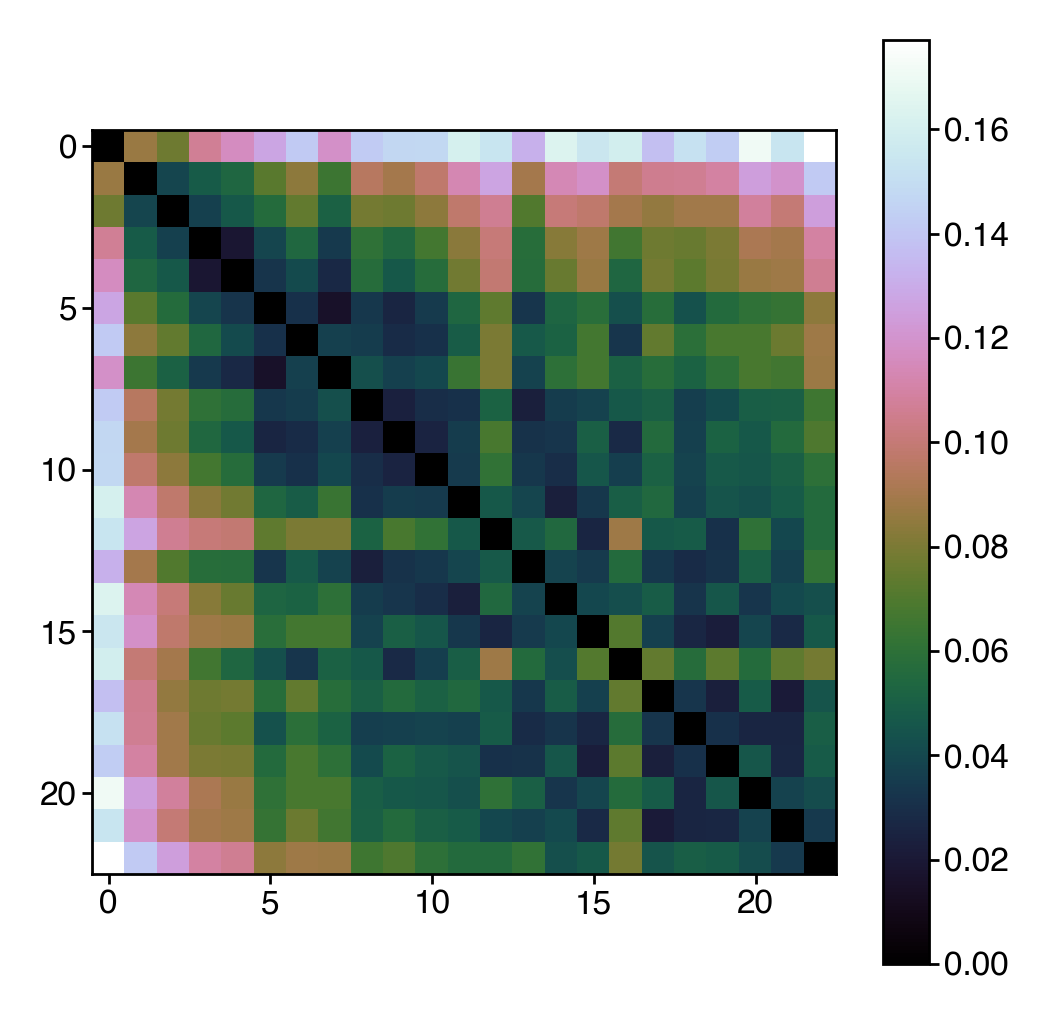

In [70]:
dists = squareform(pdist(avg_pc_df, metric='euclidean'))
with plt.rc_context(image_ctx):
    plt.imshow(dists)
    plt.colorbar()

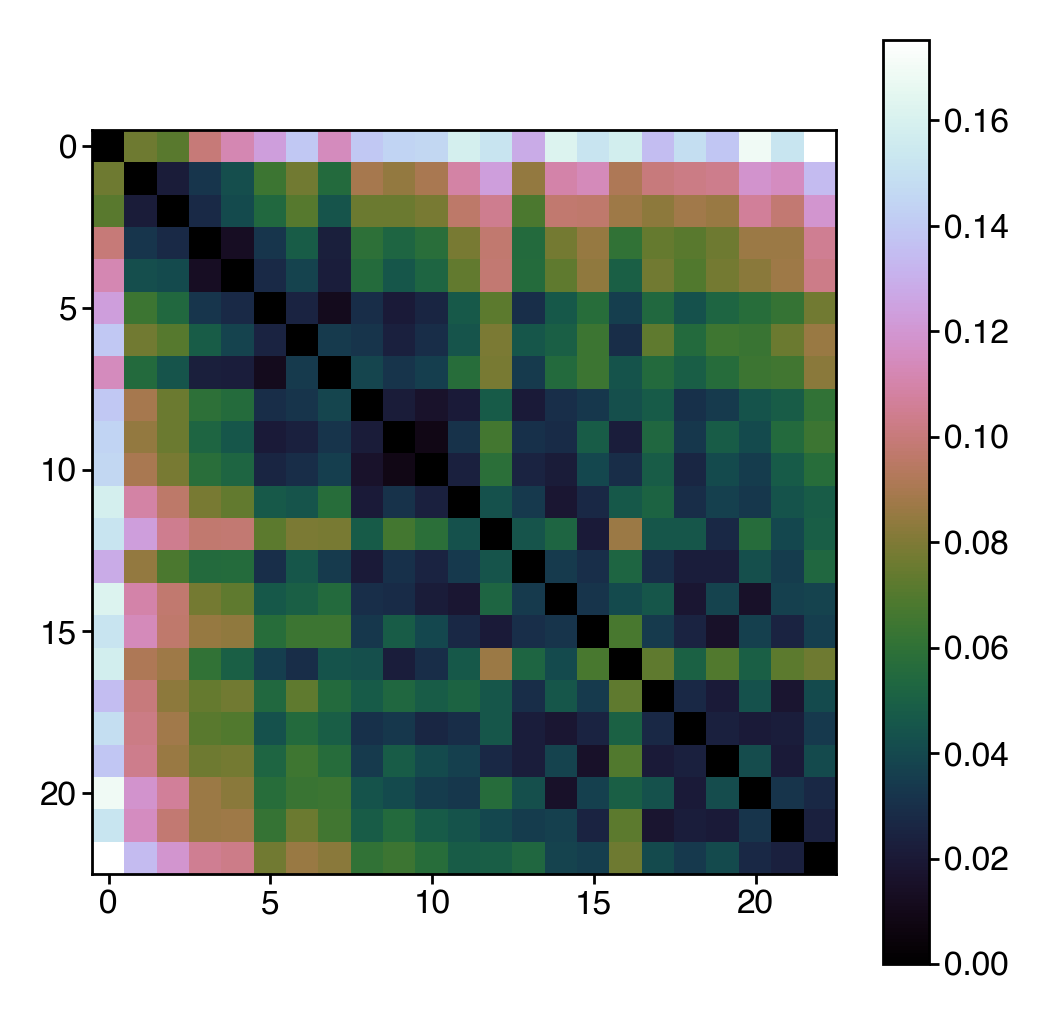

In [73]:
dists = squareform(pdist(avg_pc_df.loc[:, 0:2], metric='euclidean'))
with plt.rc_context(image_ctx):
    plt.imshow(dists)
    plt.colorbar()

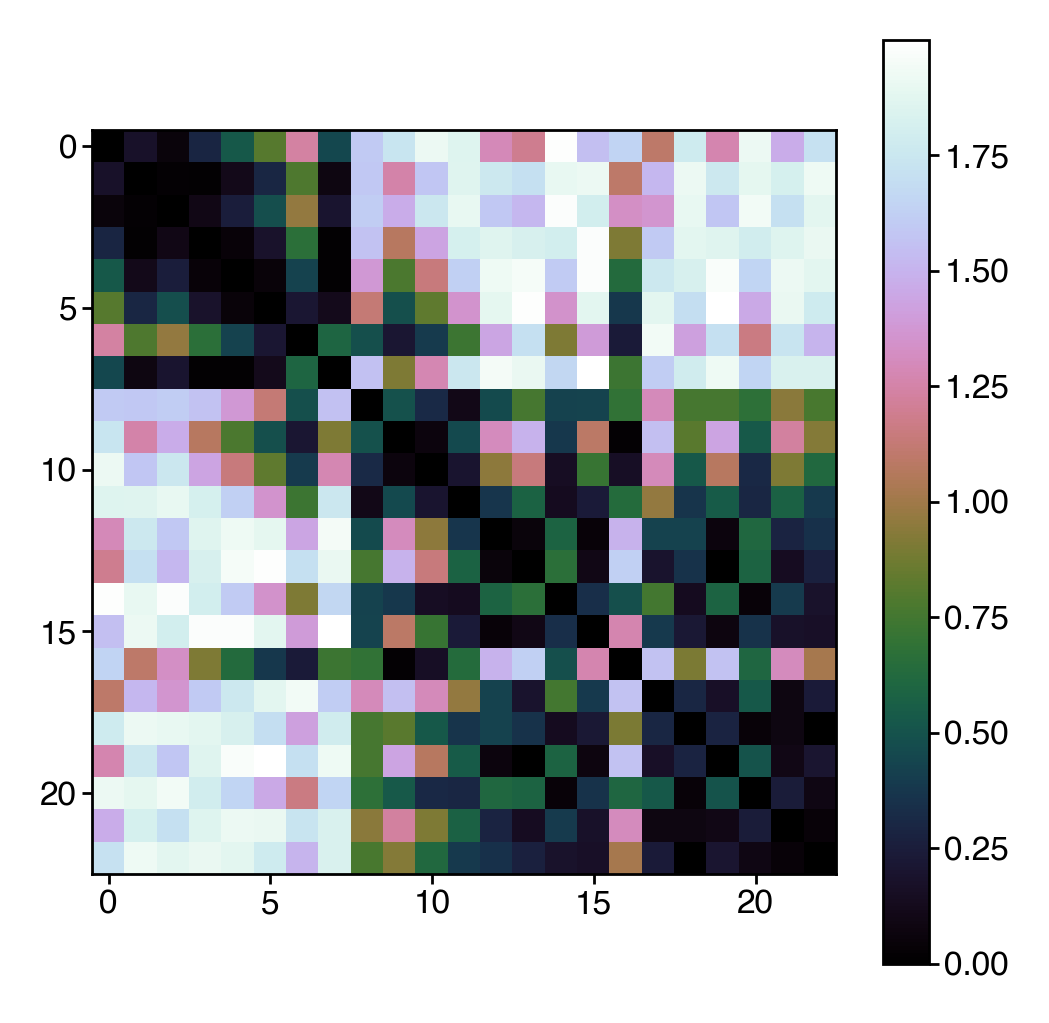

In [74]:
dists = squareform(pdist(avg_pc_df.loc[:, 0:2], metric='cosine'))
with plt.rc_context(image_ctx):
    plt.imshow(dists)
    plt.colorbar()

### Z-scored PCA

In [82]:
pca = PCA(n_components=10)
pcs = pca.fit_transform(zscore(df))

In [83]:
pc_df = pd.DataFrame(pcs, index=df.index)

In [84]:
avg_pc_df = pc_df.groupby('age').mean()

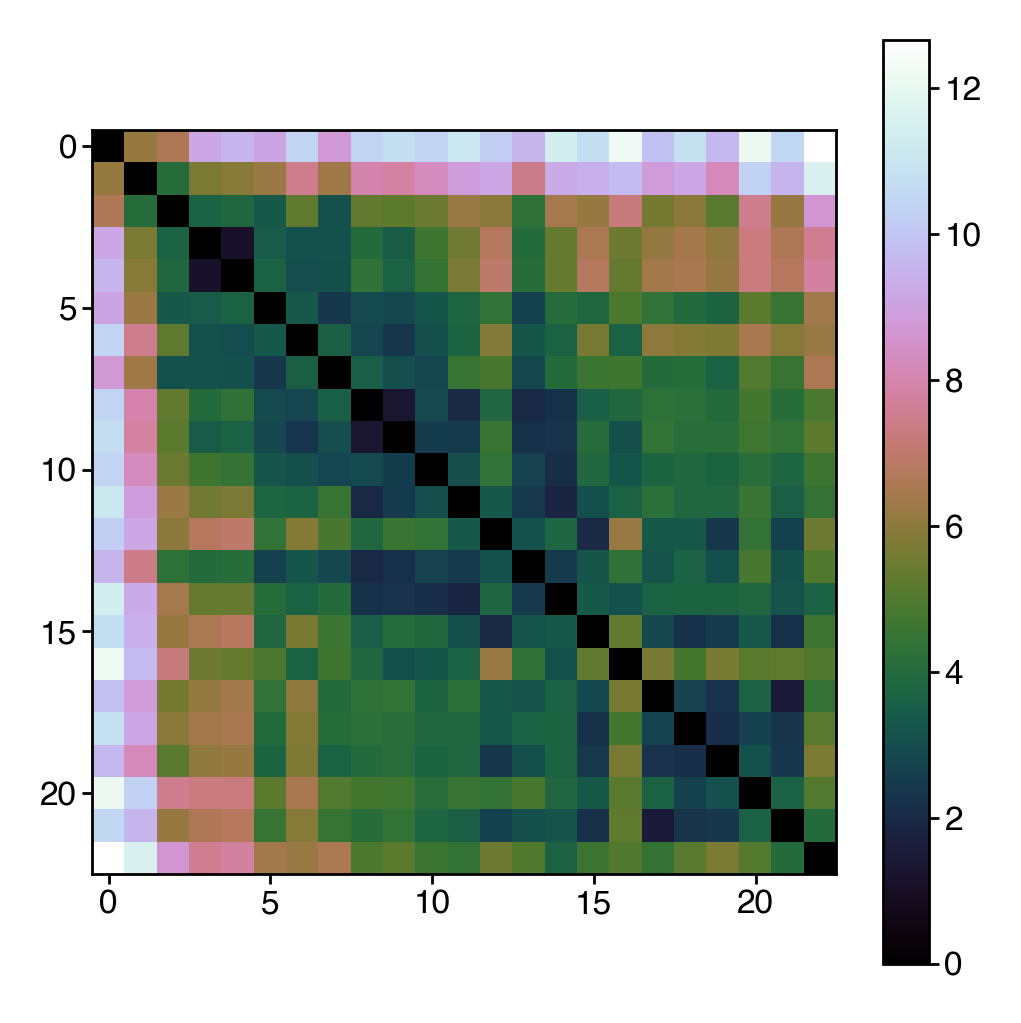

In [85]:
dists = squareform(pdist(avg_pc_df, metric='euclidean'))
with plt.rc_context(image_ctx):
    plt.imshow(dists)
    plt.colorbar()

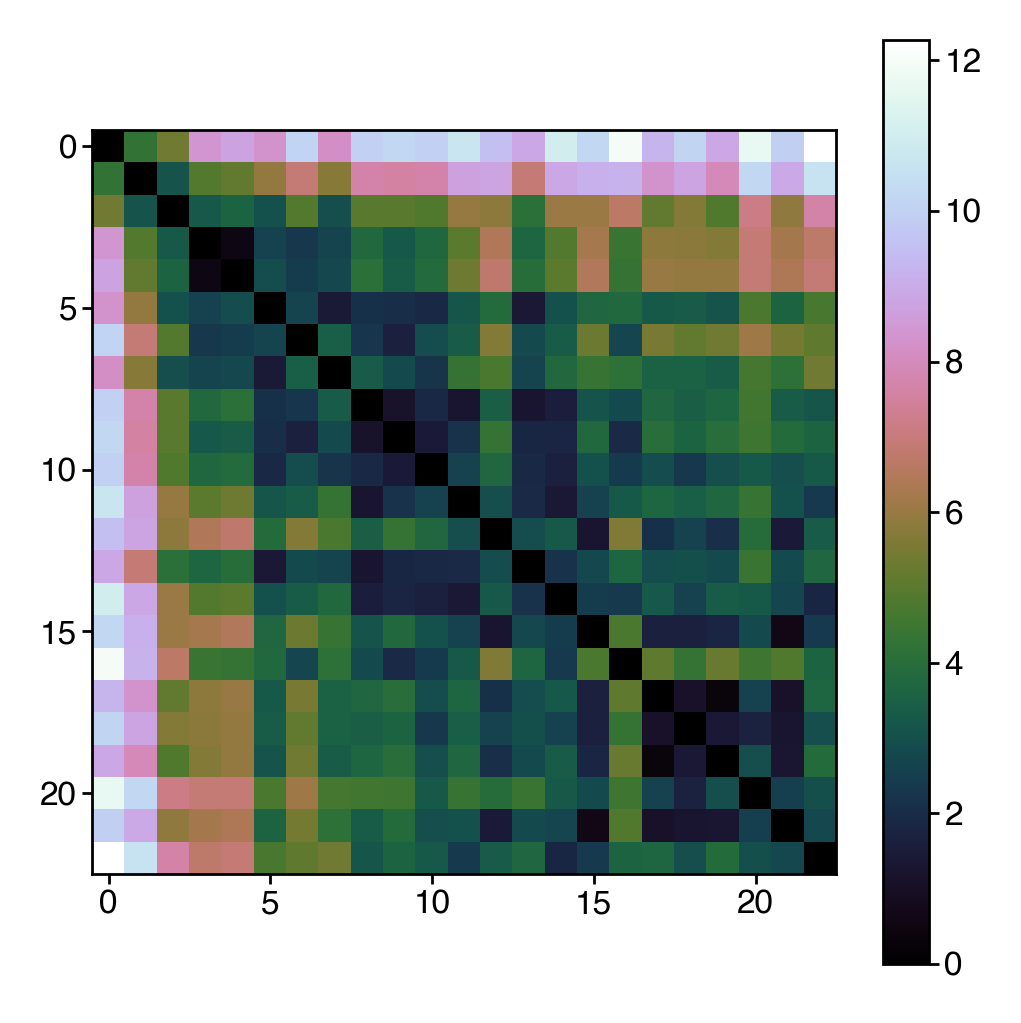

In [86]:
dists = squareform(pdist(avg_pc_df.loc[:, 0:2], metric='euclidean'))
with plt.rc_context(image_ctx):
    plt.imshow(dists)
    plt.colorbar()

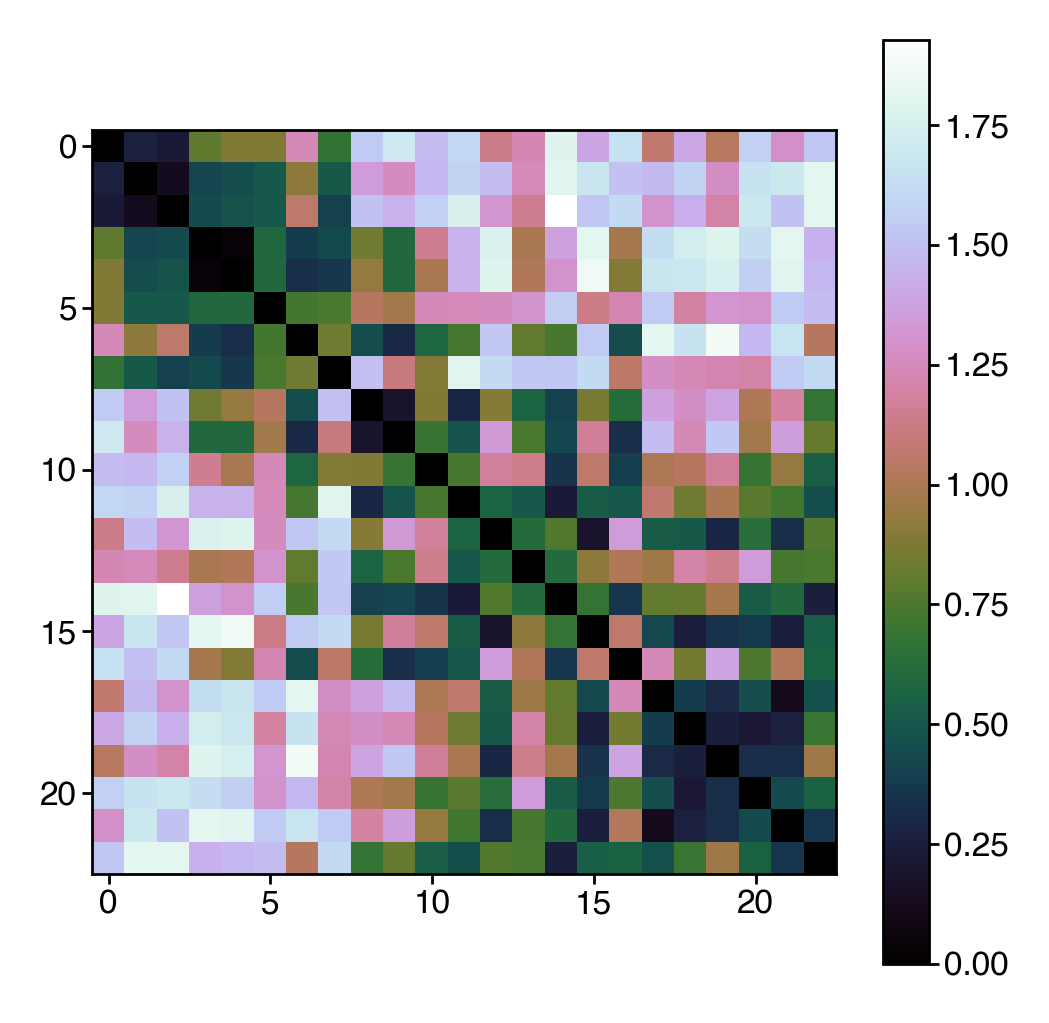

In [88]:
dists = squareform(pdist(avg_pc_df, metric='cosine'))
with plt.rc_context(image_ctx):
    plt.imshow(dists)
    plt.colorbar()

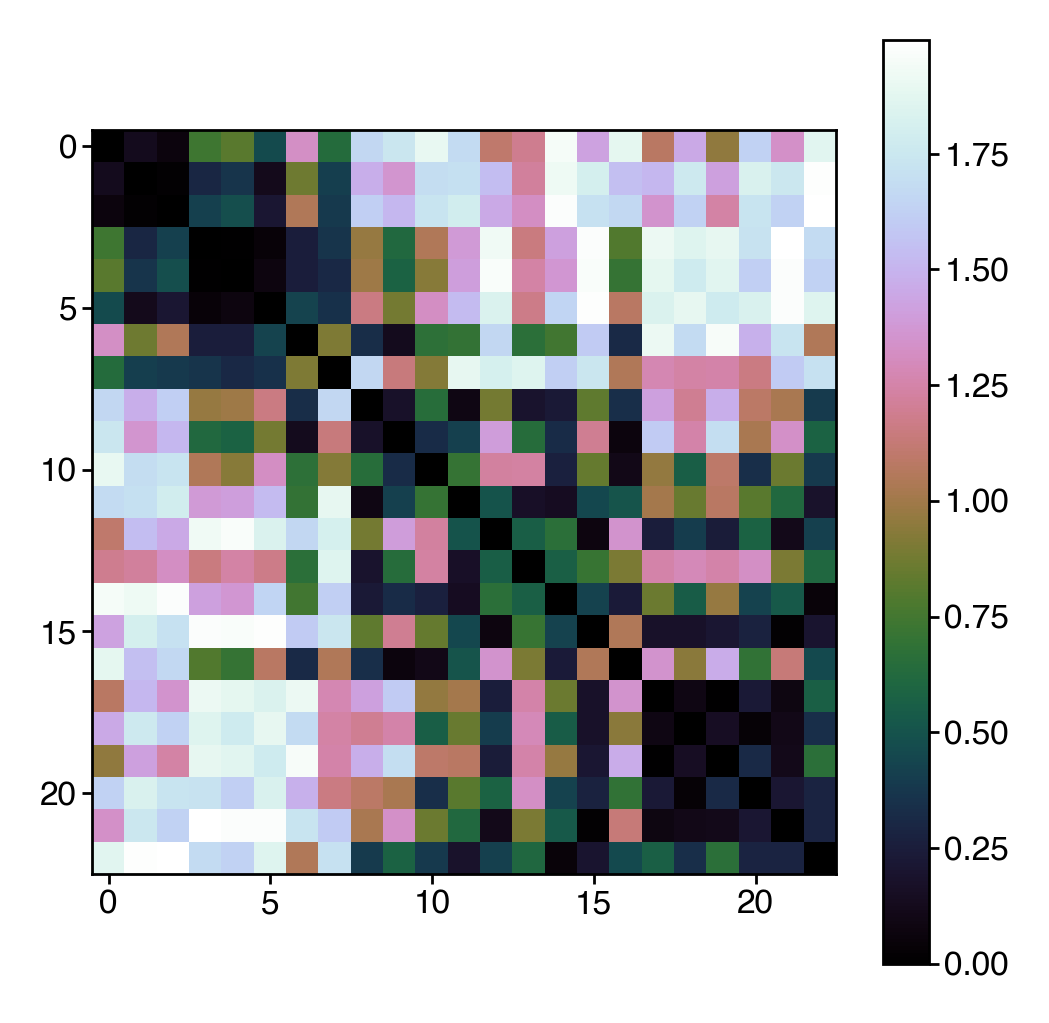

In [87]:
dists = squareform(pdist(avg_pc_df.loc[:, 0:2], metric='cosine'))
with plt.rc_context(image_ctx):
    plt.imshow(dists)
    plt.colorbar()

# Inter-individual distance with cosine distance

In [114]:
iid = dict()
iid_df = []
for age, _df in df.groupby('age'):
    inter_ind_dists = pdist(_df, metric='cosine')
    iid[age] = inter_ind_dists
    iid_df.append(pd.DataFrame(dict(iid=inter_ind_dists, age=age)))
iid_df = pd.concat(iid_df)

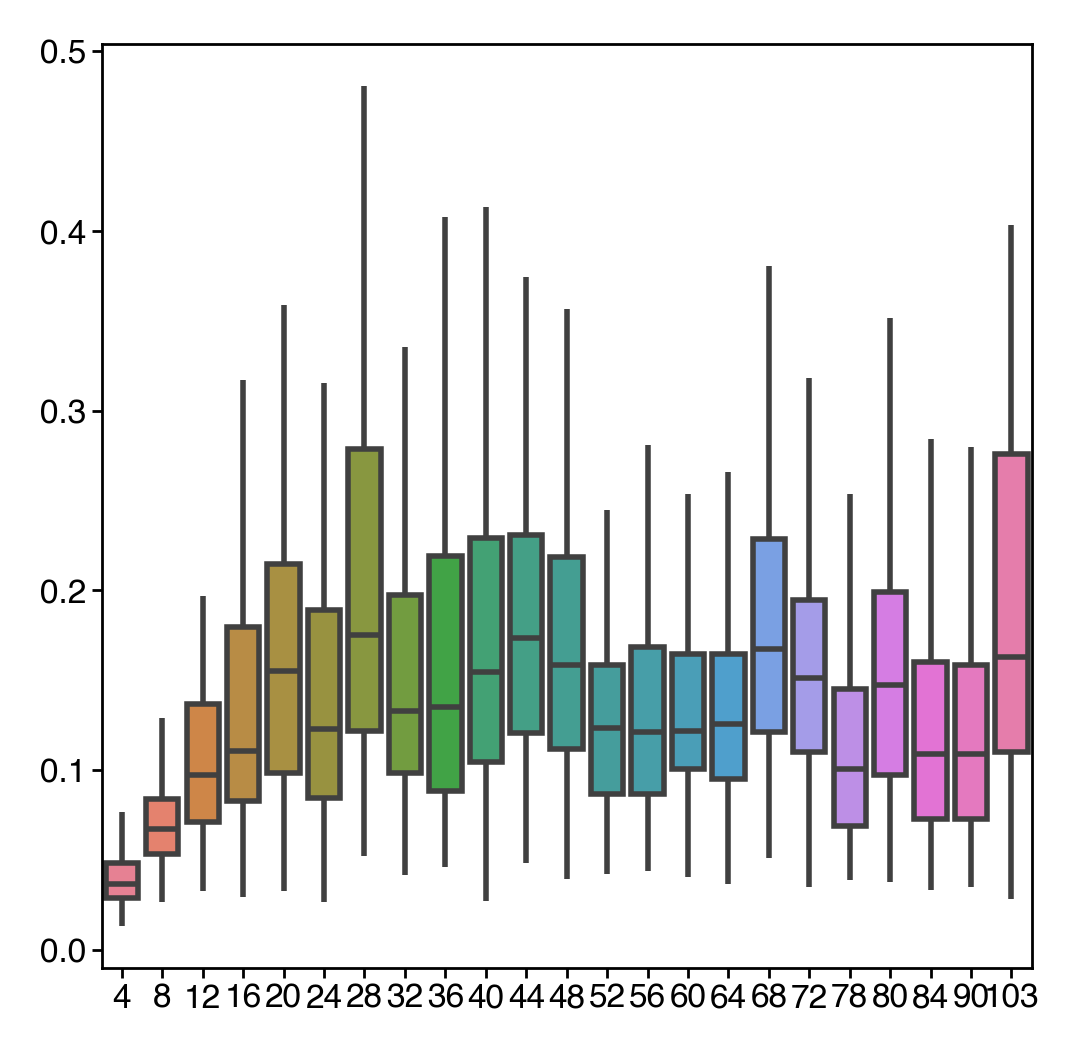

In [110]:
a = sns.boxplot(data=iid, showfliers=False, showcaps=False)

In [119]:
sns.regplot(data=iid_df, x='age', y='iid', logx=True, ax=a, scatter=True)

<Axes: xlabel='age', ylabel='iid'>

In [120]:
iid = dict()
iid_df = []
for age, _df in df.groupby('age'):
    inter_ind_dists = pdist(_df, metric='euclidean')
    iid[age] = inter_ind_dists
    iid_df.append(pd.DataFrame(dict(iid=inter_ind_dists, age=age)))
iid_df = pd.concat(iid_df)

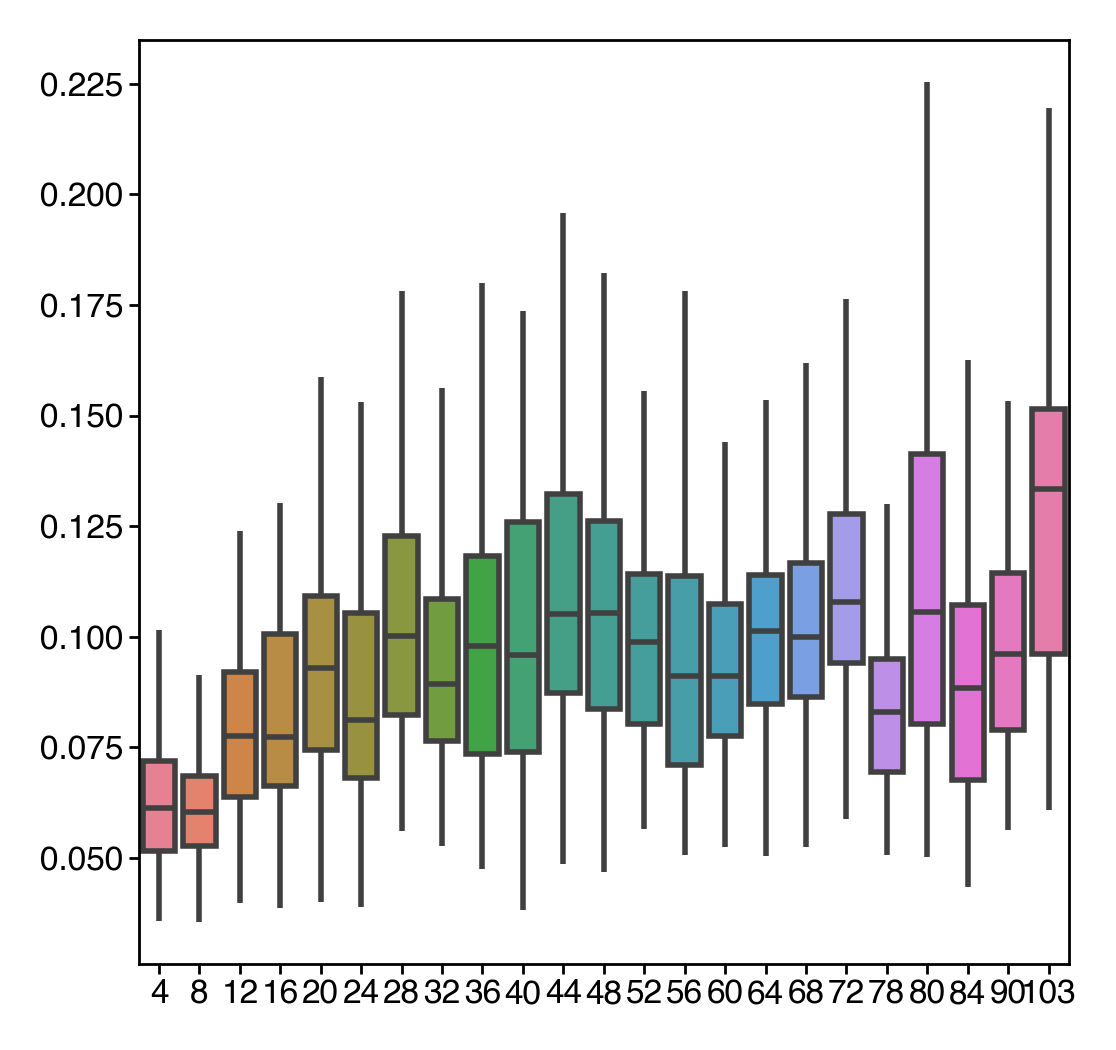

In [121]:
a = sns.boxplot(data=iid, showfliers=False, showcaps=False)

In [122]:
iid = dict()
iid_df = []
for age, _df in df.groupby('age'):
    inter_ind_dists = pdist(_df, metric='jensenshannon')
    iid[age] = inter_ind_dists
    iid_df.append(pd.DataFrame(dict(iid=inter_ind_dists, age=age)))
iid_df = pd.concat(iid_df)

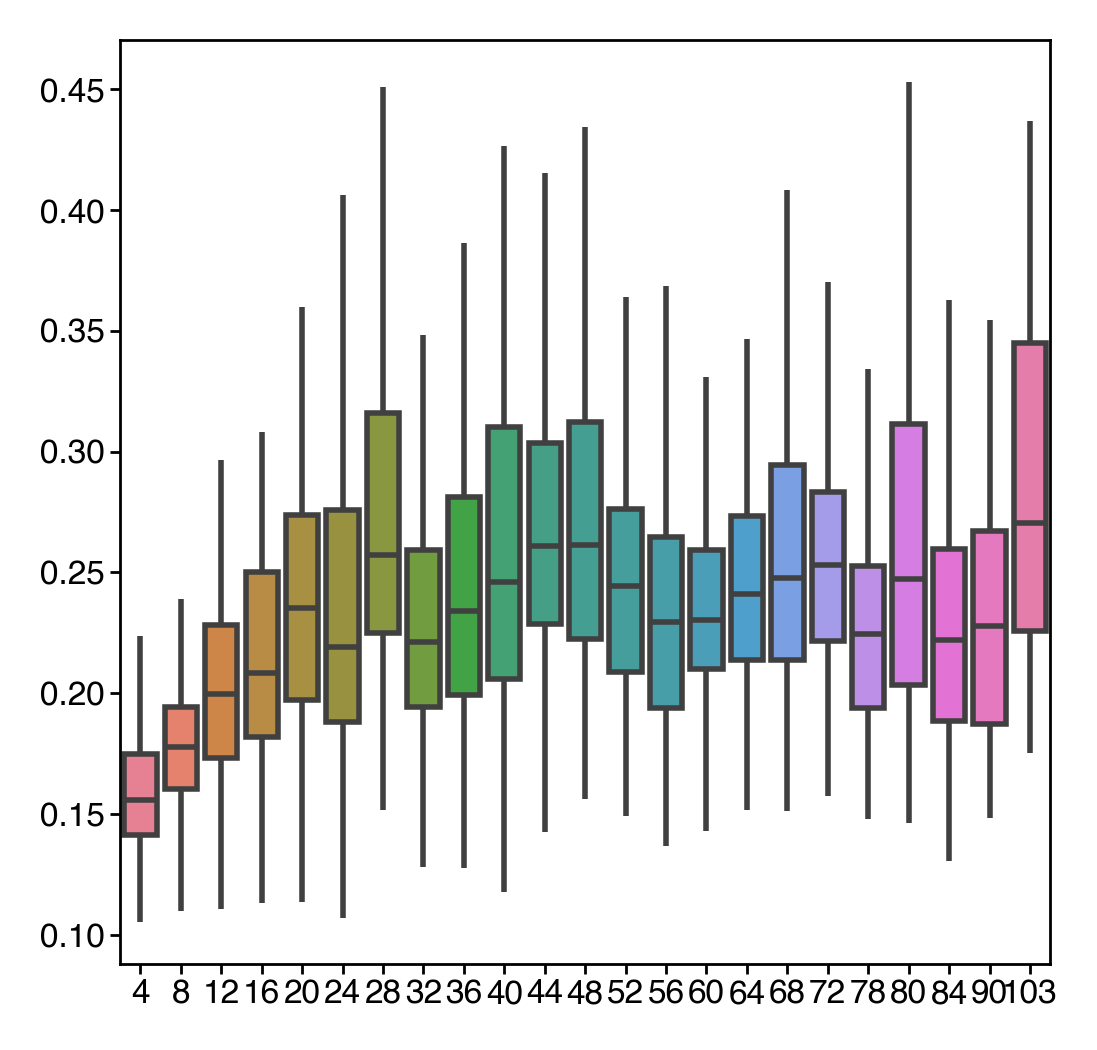

In [123]:
a = sns.boxplot(data=iid, showfliers=False, showcaps=False)

## IID using PCA

In [125]:
pca = PCA(n_components=10)
pcs = pca.fit_transform(df)
pc_df = pd.DataFrame(pcs, index=df.index)

In [132]:
iid = dict()
iid_df = []
for age, _df in pc_df.groupby('age'):
    inter_ind_dists = pdist(_df.loc[:, 2:], metric='euclidean')
    iid[age] = inter_ind_dists
    iid_df.append(pd.DataFrame(dict(iid=inter_ind_dists, age=age)))
iid_df = pd.concat(iid_df)

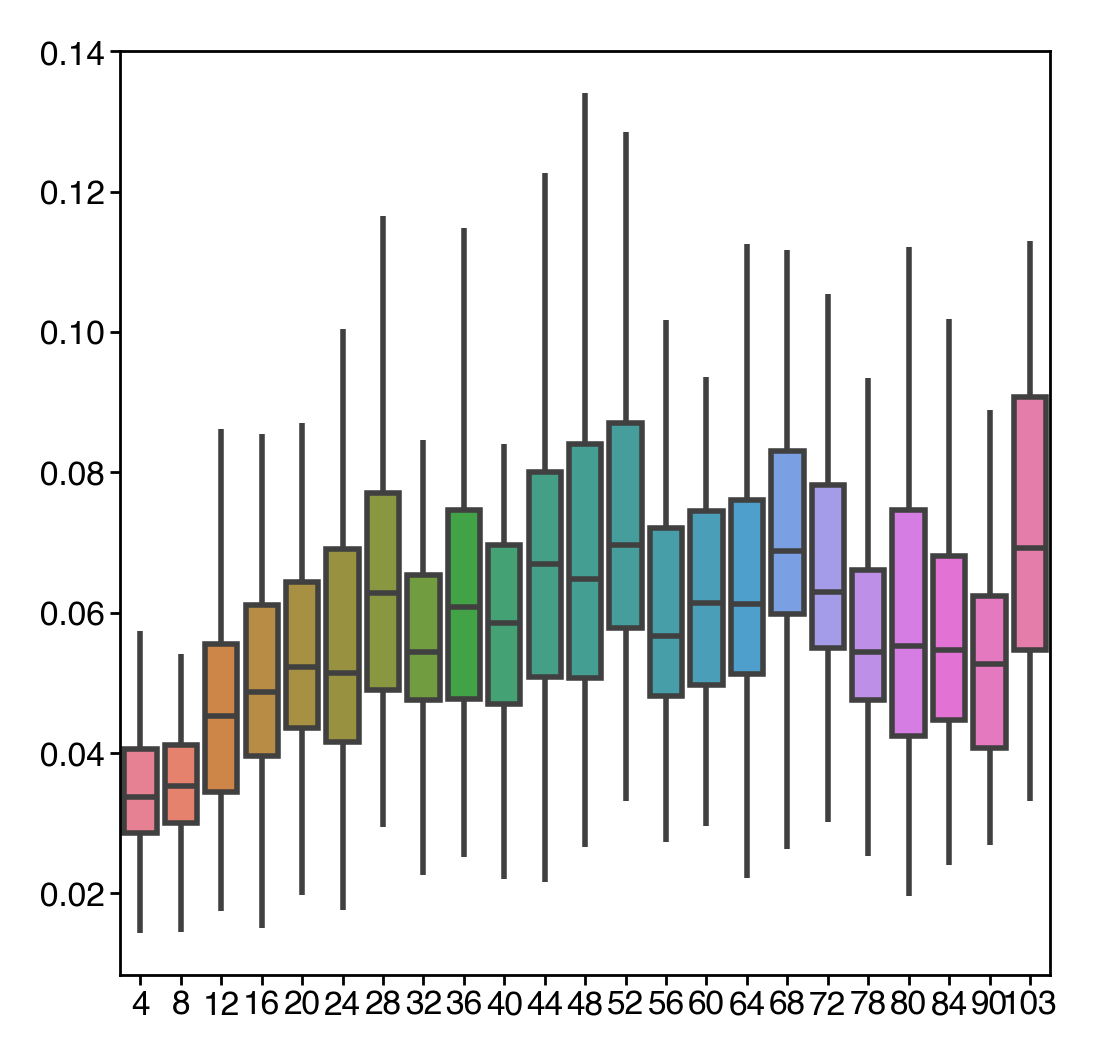

In [133]:
a = sns.boxplot(data=iid, showfliers=False, showcaps=False)

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import r2_score

In [150]:
# linear model
mdl = LinearRegression()

r2_scores = []
for i in range(10):
    preds = cross_val_predict(mdl, iid_df[['age']].to_numpy(), iid_df[['iid']].to_numpy(), cv=KFold(n_splits=8, shuffle=True, random_state=0), n_jobs=-1)
    r2 = r2_score(iid_df['iid'].to_numpy(), preds, multioutput="variance_weighted")
    r2_scores.append(r2)

In [149]:
np.mean(r2_scores)

0.033028331924405796

In [151]:
# exp model
mdl = LinearRegression()

r2_scores = []
for i in range(10):
    preds = cross_val_predict(mdl, np.log(iid_df[['age']]).to_numpy(), iid_df[['iid']].to_numpy(), cv=KFold(n_splits=8, shuffle=True, random_state=0), n_jobs=-1)
    r2 = r2_score(iid_df['iid'].to_numpy(), preds, multioutput="variance_weighted")
    r2_scores.append(r2)

In [152]:
np.mean(r2_scores)

0.07013745295617946

In [155]:
# quadratic model
mdl = LinearRegression()

r2_scores = []
for i in range(10):
    preds = cross_val_predict(mdl, np.array([iid_df['age'], iid_df['age'] ** 2]).T, iid_df[['iid']].to_numpy(), cv=KFold(n_splits=8, shuffle=True, random_state=0), n_jobs=-1)
    r2 = r2_score(iid_df['iid'].to_numpy(), preds, multioutput="variance_weighted")
    r2_scores.append(r2)

In [156]:
np.mean(r2_scores)

0.07829332608967322

In [158]:
iid = dict()
iid_df = []
for age, _df in df.groupby('age'):
    inter_ind_dists = pdist(_df, metric='jensenshannon')
    iid[age] = inter_ind_dists
    iid_df.append(pd.DataFrame(dict(iid=inter_ind_dists, age=age)))
iid_df = pd.concat(iid_df)

In [159]:
# linear model
mdl = LinearRegression()

r2_scores = []
for i in range(10):
    preds = cross_val_predict(mdl, iid_df[['age']].to_numpy(), iid_df[['iid']].to_numpy(), cv=KFold(n_splits=8, shuffle=True, random_state=0), n_jobs=-1)
    r2 = r2_score(iid_df['iid'].to_numpy(), preds, multioutput="variance_weighted")
    r2_scores.append(r2)

In [160]:
np.mean(r2_scores)

0.04353729511282034

In [161]:
# exp model
mdl = LinearRegression()

r2_scores = []
for i in range(10):
    preds = cross_val_predict(mdl, np.log(iid_df[['age']]).to_numpy(), iid_df[['iid']].to_numpy(), cv=KFold(n_splits=8, shuffle=True, random_state=0), n_jobs=-1)
    r2 = r2_score(iid_df['iid'].to_numpy(), preds, multioutput="variance_weighted")
    r2_scores.append(r2)

In [162]:
np.mean(r2_scores)

0.0950561882181139

In [163]:
# quadratic model
mdl = LinearRegression()

r2_scores = []
for i in range(10):
    preds = cross_val_predict(mdl, np.array([iid_df['age'], iid_df['age'] ** 2]).T, iid_df[['iid']].to_numpy(), cv=KFold(n_splits=8, shuffle=True, random_state=0), n_jobs=-1)
    r2 = r2_score(iid_df['iid'].to_numpy(), preds, multioutput="variance_weighted")
    r2_scores.append(r2)

In [164]:
np.mean(r2_scores)

0.10032365738783192

In [165]:
iid = dict()
iid_df = []
for age, _df in df.groupby('age'):
    inter_ind_dists = pdist(_df, metric='cosine')
    iid[age] = inter_ind_dists
    iid_df.append(pd.DataFrame(dict(iid=inter_ind_dists, age=age)))
iid_df = pd.concat(iid_df)

In [166]:
# linear model
mdl = LinearRegression()

r2_scores = []
for i in range(10):
    preds = cross_val_predict(mdl, iid_df[['age']].to_numpy(), iid_df[['iid']].to_numpy(), cv=KFold(n_splits=8, shuffle=True, random_state=0), n_jobs=-1)
    r2 = r2_score(iid_df['iid'].to_numpy(), preds, multioutput="variance_weighted")
    r2_scores.append(r2)

In [167]:
np.mean(r2_scores)

0.008576343091839633

In [168]:
# exp model
mdl = LinearRegression()

r2_scores = []
for i in range(10):
    preds = cross_val_predict(mdl, np.log(iid_df[['age']]).to_numpy(), iid_df[['iid']].to_numpy(), cv=KFold(n_splits=8, shuffle=True, random_state=0), n_jobs=-1)
    r2 = r2_score(iid_df['iid'].to_numpy(), preds, multioutput="variance_weighted")
    r2_scores.append(r2)

In [169]:
np.mean(r2_scores)

0.044258316610948256

In [170]:
# quadratic model
mdl = LinearRegression()

r2_scores = []
for i in range(10):
    preds = cross_val_predict(mdl, np.array([iid_df['age'], iid_df['age'] ** 2]).T, iid_df[['iid']].to_numpy(), cv=KFold(n_splits=8, shuffle=True, random_state=0), n_jobs=-1)
    r2 = r2_score(iid_df['iid'].to_numpy(), preds, multioutput="variance_weighted")
    r2_scores.append(r2)

In [171]:
np.mean(r2_scores)

0.0620332344873621

# K-means clustering with silhouette score

In [6]:
ss_d = {}
for i in range(2, 7):
    km = KMeans(n_clusters=i, random_state=0)
    lbls = km.fit_predict(df.T)
    ss = silhouette_score(df.T, lbls)
    ss_d[i] = ss
ss_d

{2: 0.49331316, 3: 0.39583704, 4: 0.27844384, 5: 0.2848551, 6: 0.27800375}

In [7]:
km = KMeans(n_clusters=5, random_state=0)
lbls = km.fit_predict(df.T)
syll_lbl_df = pd.DataFrame({"syll": df.columns, "lbl": lbls})

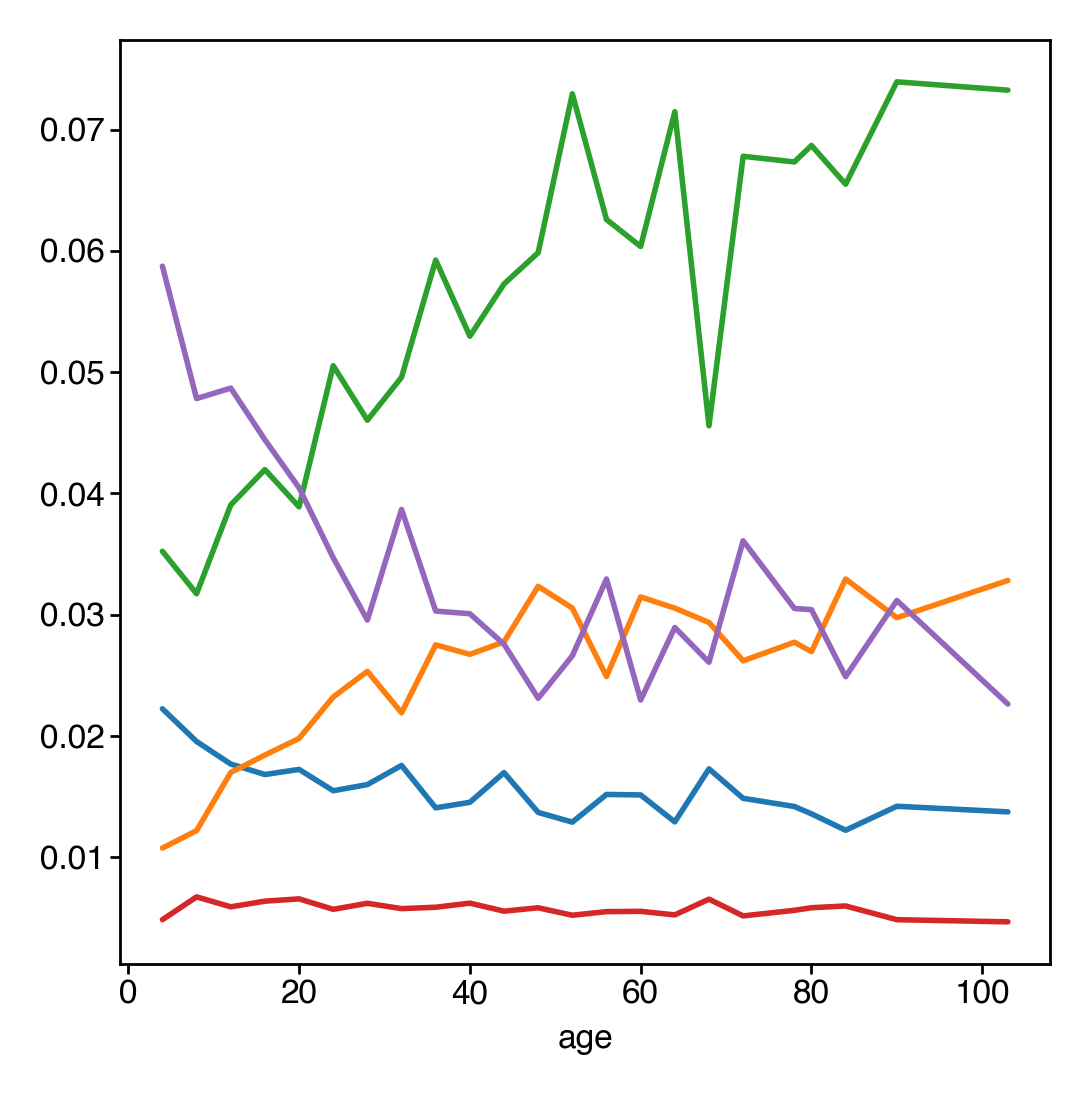

In [8]:
to_plt = []
for lbl, sylls in syll_lbl_df.groupby('lbl'):
    m = df[sylls['syll']].mean(1)
    to_plt.append(m.groupby('age').mean())
    to_plt[-1].plot()

In [9]:
norm_df = df - df.min()
norm_df = norm_df / norm_df.quantile(0.95)

In [10]:
ss_d = {}
for i in range(2, 7):
    km = KMeans(n_clusters=i, random_state=0)
    lbls = km.fit_predict(norm_df.T)
    ss = silhouette_score(norm_df.T, lbls)
    ss_d[i] = ss
ss_d

{2: 0.09926693698379782,
 3: 0.1222068033039928,
 4: 0.13271514344056393,
 5: 0.1284742734949697,
 6: 0.10846024736306195}

[Text(0, 0.5, 'Silhouette score'),
 Text(0.5, 0, 'Number of clusters'),

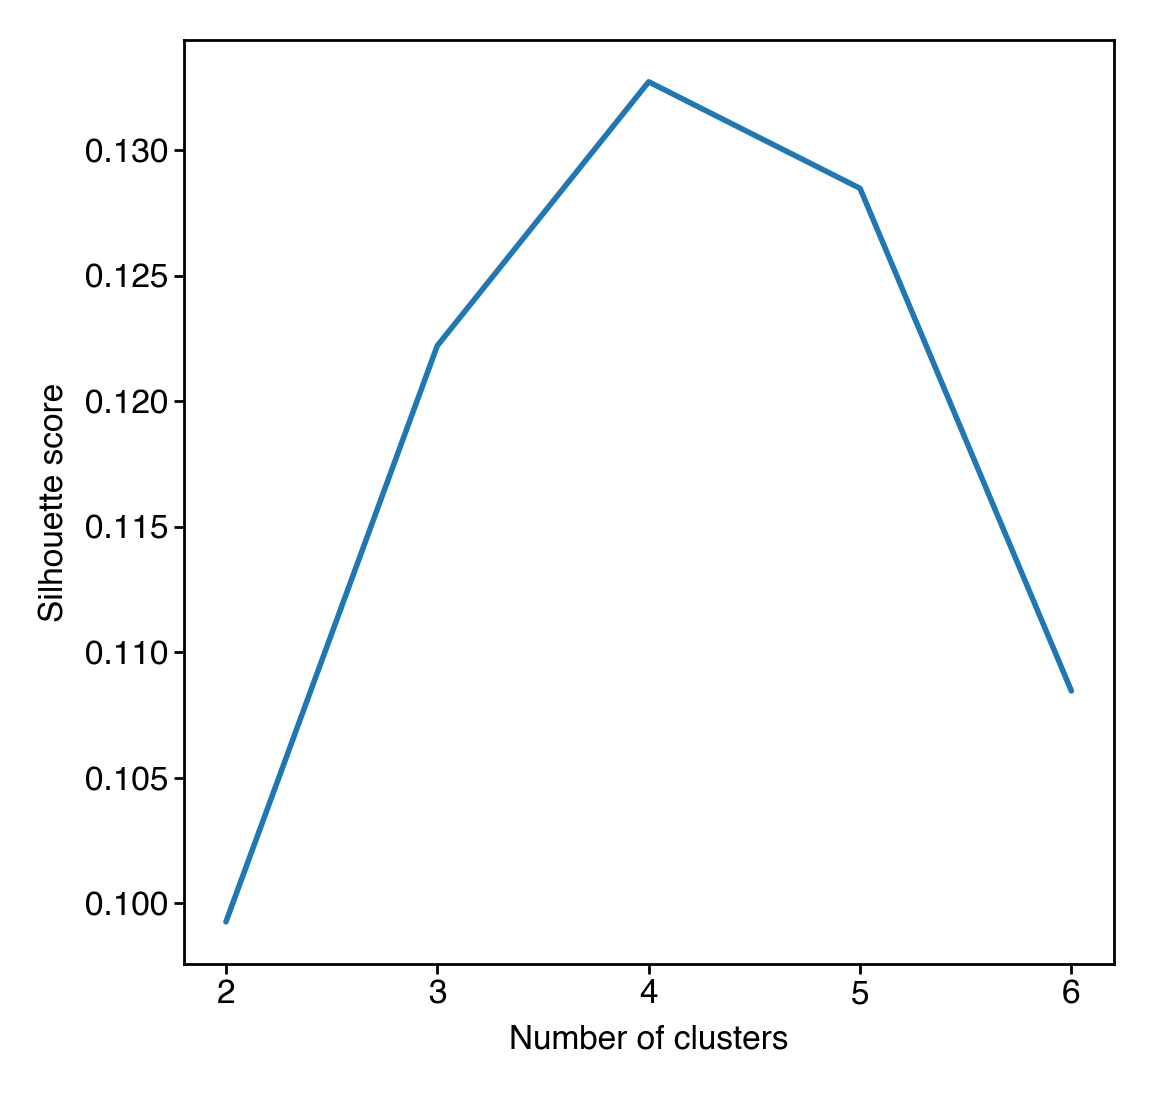

In [15]:
ax = pd.Series(ss_d).plot()
ax.set(ylabel='Silhouette score', xlabel='Number of clusters', xticks=range(2, 7))

In [11]:
km = KMeans(n_clusters=4, random_state=0)
lbls = km.fit_predict(norm_df.T)
syll_lbl_df = pd.DataFrame({"syll": df.columns, "lbl": lbls})

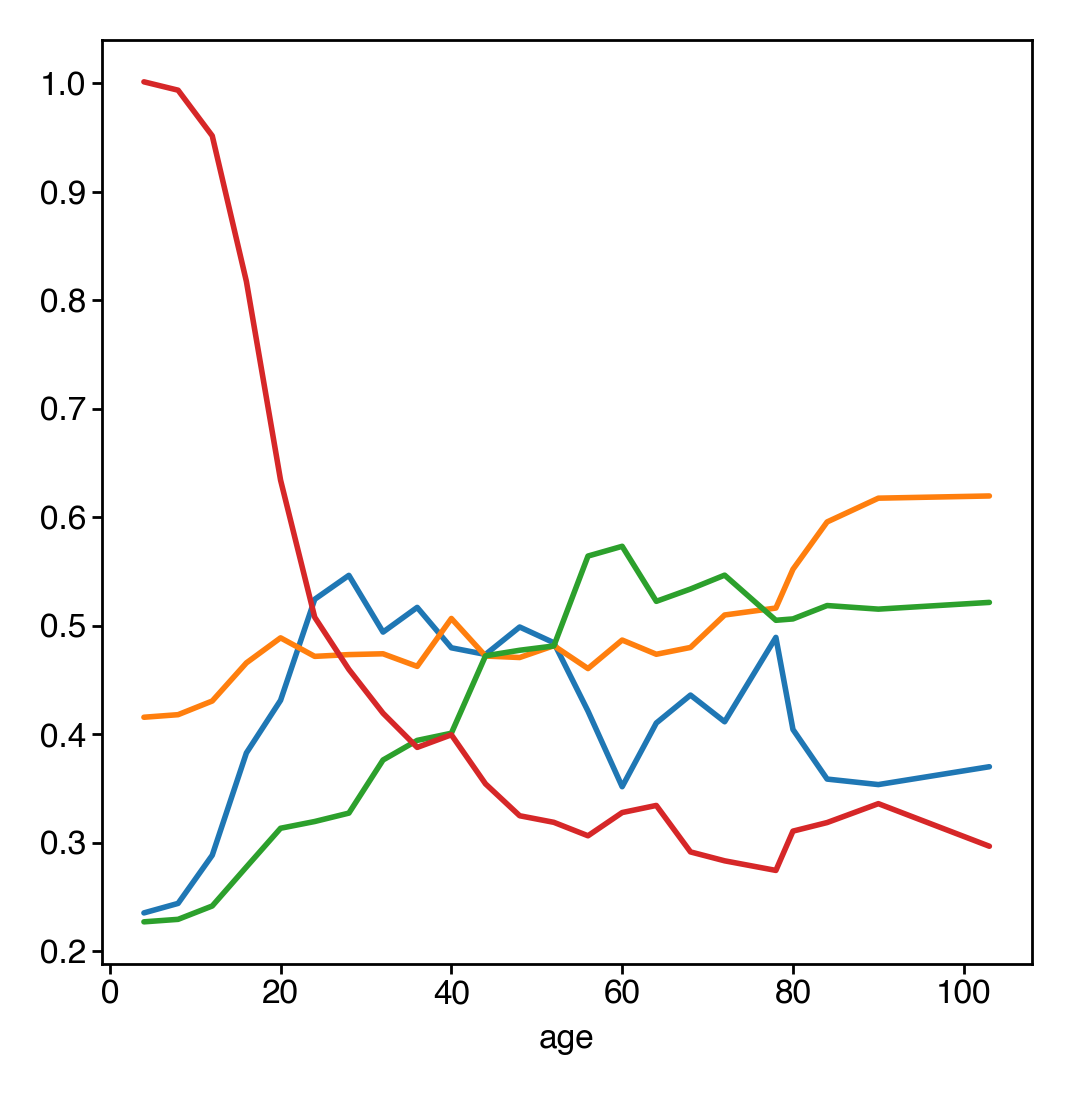

In [12]:
to_plt = []
for lbl, sylls in syll_lbl_df.groupby('lbl'):
    m = norm_df[sylls['syll']].mean(1)
    to_plt.append(m.groupby('age').mean().rolling(5, win_type='gaussian', min_periods=1, center=True).mean(std=0.7))
    to_plt[-1].plot()

# Rate of change using euclidean/cosine distance and smoothing

In [17]:
avg_usage = df.groupby('age').mean()

In [43]:
smoothed_avg_usage = avg_usage.rolling(5, min_periods=1, win_type='gaussian', center=True).mean(std=2)

<Axes: xlabel='age'>

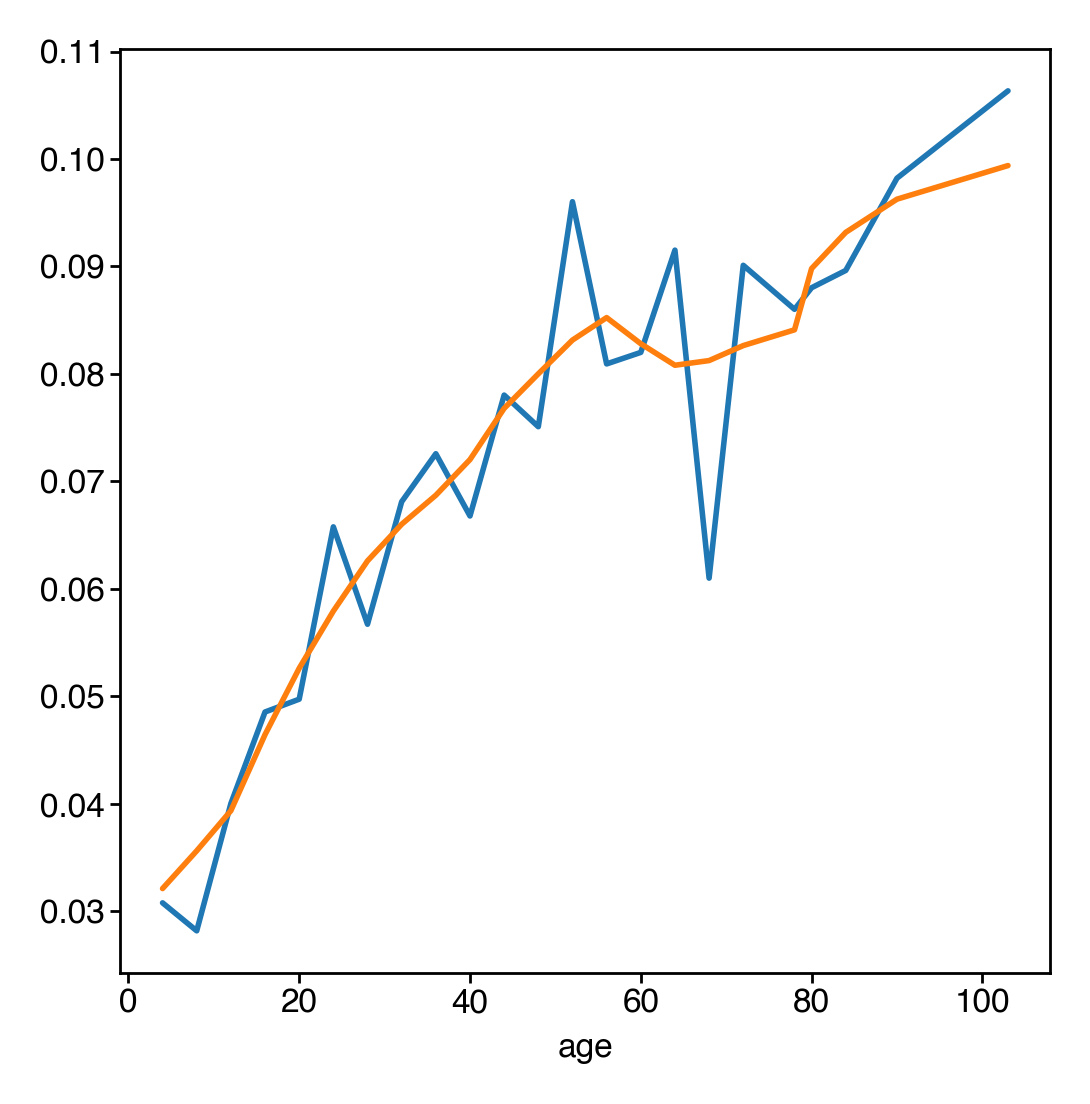

In [44]:
avg_usage.iloc[:, 0].plot()
smoothed_avg_usage.iloc[:, 0].plot()

<Axes: xlabel='age'>

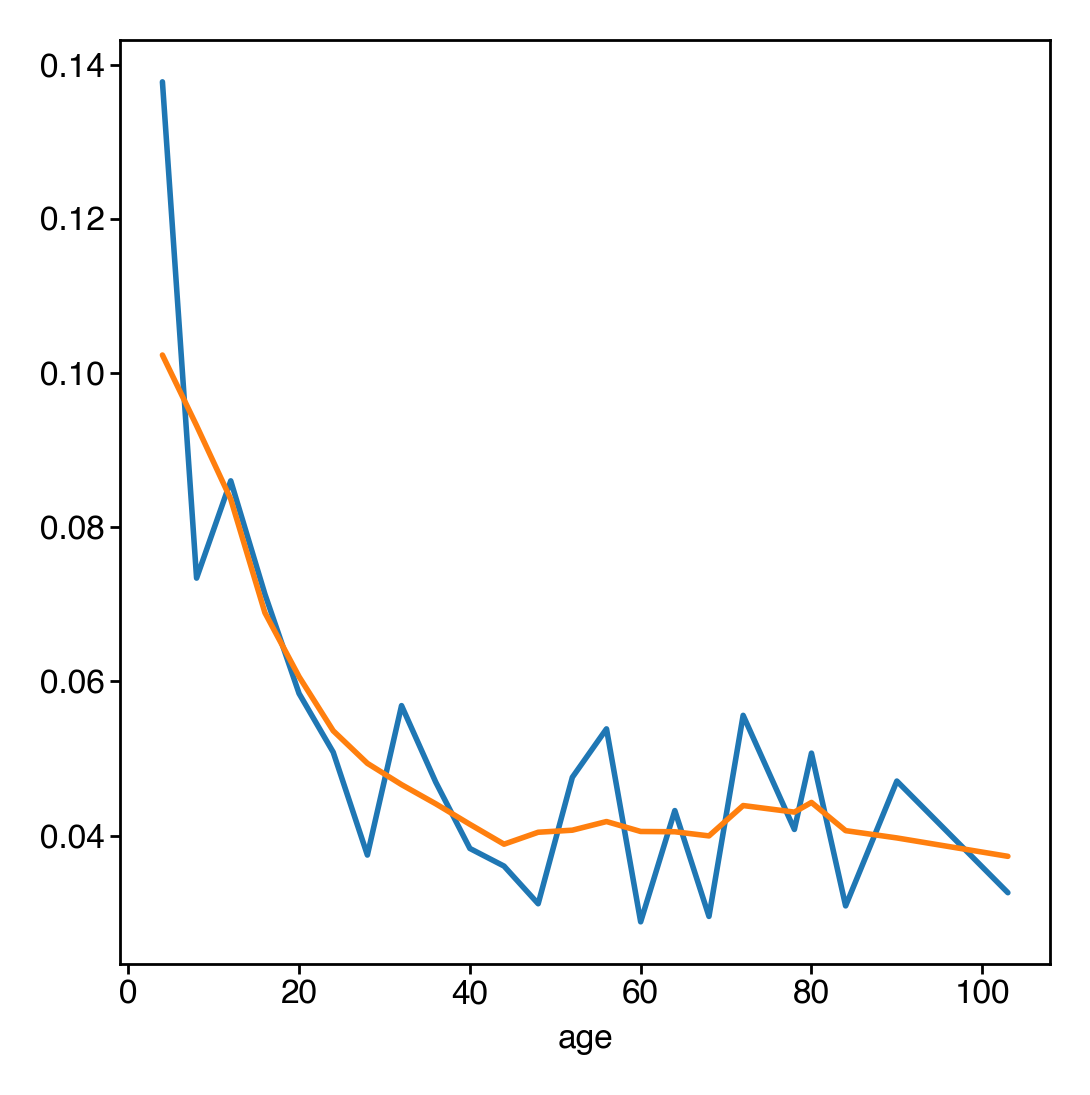

In [45]:
avg_usage.iloc[:, 1].plot()
smoothed_avg_usage.iloc[:, 1].plot()

<Axes: xlabel='age'>

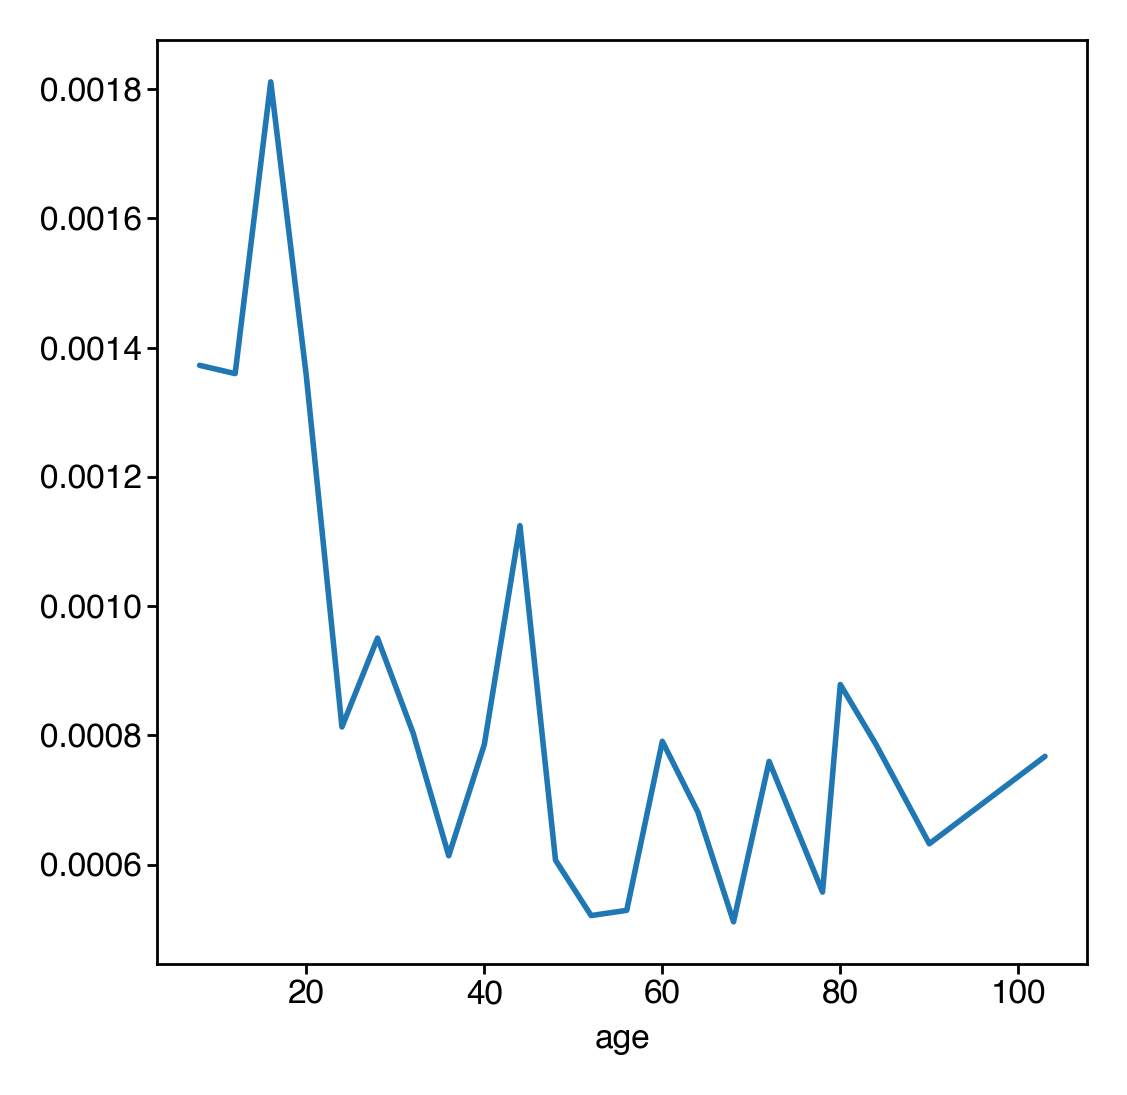

In [46]:
smoothed_avg_usage.diff().abs().mean(1).plot()